In [3]:
# If this looks a mess my notebook "broke" 11/30 and now i'm scrambling to fix it.

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np


csv_file_path = '../data/BDI3 All Evals for NSS 11-2023.csv'

data_csv = pd.read_csv(csv_file_path)

data_csv.head()

C:\Users\iliss\AppData\Local\Temp\ipykernel_15076\3271228793.py:11: DtypeWarning: Columns (0,43) have mixed types. Specify dtype option on import or set low_memory=False.
  data_csv = pd.read_csv(csv_file_path)


,Child ID,Gender,Date of Birth,Location - Sub Level 1,Program Label,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,Adaptive 95% Confidence Interval,Adaptive RDI,...,Code 1,Code 2,Code 3,Code 4,Code 5,Code 6,Code 7,Code 8,Code 9,Code 10
0,44879,F,9/27/2022,Southwest,BDI-3 Eligibility Evaluation,7.0,85.0,16,77-97,39/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,47795,F,12/23/2020,Greater Nashville,BDI-3 Eligibility Evaluation,16.0,88.0,21,82-96,79/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,54340,M,6/22/2021,First Tennessee,BDI-3 Eligibility Evaluation,8.0,90.0,25,81-101,77/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,54344,F,3/7/2022,Southeast Tennessee,BDI-3 Eligibility Evaluation,13.0,115.0,84,103-123,99/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,54515,M,11/4/2021,Memphis Delta,BDI-3 Eligibility Evaluation,5.0,75.0,5,68-88,Sep-90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
columns_to_drop = ['Code 1', 'Code 2', 'Code 3', 'Code 4', 'Code 5', 
                   'Code 6', 'Code 7', 'Code 8', 'Code 9', 'Code 10']

data_csv = data_csv.drop(columns=columns_to_drop)

# drop the empty columns

In [3]:
data_csv.columns = [c.replace(' ', '_') for c in data_csv.columns]

In [4]:
# 1. In which domains (and sub-domains) are children performing highest and lowest?

In [5]:
data_csv.columns.values.tolist()

['Child_ID',
 'Gender',
 'Date_of_Birth',
 'Location_-_Sub_Level_1',
 'Program_Label',
 'Adaptive_Sum_of_Scaled_Scores',
 'Adaptive_Developmental_Quotient',
 'Adaptive_Percentile_Rank',
 'Adaptive_95%_Confidence_Interval',
 'Adaptive_RDI',
 'Adaptive_Z-Score',
 'Adaptive_T-Score',
 'Adaptive_NCE',
 'Social-Emotional_Sum_of_Scaled_Scores',
 'Social-Emotional_Developmental_Quotient',
 'Social-Emotional_Percentile_Rank',
 'Social-Emotional_95%_Confidence_Interval',
 'Social-Emotional_RDI',
 'Social-Emotional_Z-Score',
 'Social-Emotional_T-Score',
 'Social-Emotional_NCE',
 'Communication_Sum_of_Scaled_Scores',
 'Communication_Developmental_Quotient',
 'Communication_Percentile_Rank',
 'Communication_95%_Confidence_Interval',
 'Communication_RDI',
 'Communication_Z-Score',
 'Communication_T-Score',
 'Communication_NCE',
 'Motor_Sum_of_Scaled_Scores',
 'Motor_Developmental_Quotient',
 'Motor_Percentile_Rank',
 'Motor_95%_Confidence_Interval',
 'Motor_RDI',
 'Motor_Z-Score',
 'Motor_T-Score',

In [6]:
adaptive_domain = data_csv[[
    'Adaptive_Sum_of_Scaled_Scores','Adaptive_Developmental_Quotient',
 'Adaptive_Percentile_Rank',
 'Adaptive_95%_Confidence_Interval',
 'Adaptive_RDI',
 'Adaptive_Z-Score',
 'Adaptive_T-Score',
 'Adaptive_NCE',
 'Social-Emotional_Sum_of_Scaled_Scores',
 'Social-Emotional_Developmental_Quotient',
 'Social-Emotional_Percentile_Rank',
 'Social-Emotional_95%_Confidence_Interval',
 'Social-Emotional_RDI',
 'Social-Emotional_Z-Score',
 'Social-Emotional_T-Score',
 'Social-Emotional_NCE',
 'Communication_Sum_of_Scaled_Scores',
 'Communication_Developmental_Quotient',
 'Communication_Percentile_Rank',
 'Communication_95%_Confidence_Interval',
 'Communication_RDI',
 'Communication_Z-Score',
 'Communication_T-Score',
 'Communication_NCE',
 'Motor_Sum_of_Scaled_Scores',
 'Motor_Developmental_Quotient',
 'Motor_Percentile_Rank',
 'Motor_95%_Confidence_Interval',
 'Motor_RDI',
 'Motor_Z-Score',
 'Motor_T-Score',
 'Motor_NCE',
 'Cognitive_Sum_of_Scaled_Scores',
 'Cognitive_Developmental_Quotient',
 'Cognitive_Percentile_Rank',
 'Cognitive_95%_Confidence_Interval',
 'Cognitive_RDI',
 'Cognitive_Z-Score',
 'Cognitive_T-Score',
 'Cognitive_NCE',
 'BDI-3_Total_Sum_of_Scaled_Scores',
 'BDI-3_Total_Developmental_Quotient',
 'BDI-3_Total_Percentile_Rank',
 'BDI-3_Total_90%_Confidence_Interval',
 'BDI-3_Total_95%_Confidence_Interval',
 'BDI-3_Total_Z-Score',
 'BDI-3_Total_T-Score',
 'BDI-3_Total_NCE',
 'Adaptive-Self_Care_Date_of_Testing',
 'Adaptive-Self_Care_RS',
 'Adaptive-Self_Care_SS',
 'Adaptive-Self_Care_PR',
 'Adaptive-Self_Care_AE',
 'Adaptive-Self_Care_RDI',
 'Adaptive-Self_Care_CSS',
 'Adaptive-Self_Care_CSS_90%',
 'Adaptive-Self_Care_Z-Score',
 'Adaptive-Self_Care_T-Score',
 'Adaptive-Self_Care_NCE',
 'Adaptive-Personal_Responsibility_Date_of_Testing',
 'Adaptive-Personal_Responsibility_RS',
 'Adaptive-Personal_Responsibility_SS',
 'Adaptive-Personal_Responsibility_PR',
 'Adaptive-Personal_Responsibility_AE',
 'Adaptive-Personal_Responsibility_RDI',
 'Adaptive-Personal_Responsibility_CSS',
 'Adaptive-Personal_Responsibility_CSS_90%',
 'Adaptive-Personal_Responsibility_Z-Score',
 'Adaptive-Personal_Responsibility_T-Score',
 'Adaptive-Personal_Responsibility_NCE',
 'Social_Emotional-Adult_Interaction_Date_of_Testing',
 'Social_Emotional-Adult_Interaction_RS',
 'Social_Emotional-Adult_Interaction_SS',
 'Social_Emotional-Adult_Interaction_PR',
 'Social_Emotional-Adult_Interaction_AE',
 'Social_Emotional-Adult_Interaction_RDI',
 'Social_Emotional-Adult_Interaction_CSS',
 'Social_Emotional-Adult_Interaction_CSS_90%',
 'Social_Emotional-Adult_Interaction_Z-Score',
 'Social_Emotional-Adult_Interaction_T-Score',
 'Social_Emotional-Adult_Interaction_NCE',
 'Social_Emotional-Peer_Interaction_Date_of_Testing',
 'Social_Emotional-Peer_Interaction_RS',
 'Social_Emotional-Peer_Interaction_SS',
 'Social_Emotional-Peer_Interaction_PR',
 'Social_Emotional-Peer_Interaction_AE',
 'Social_Emotional-Peer_Interaction_RDI',
 'Social_Emotional-Peer_Interaction_CSS',
 'Social_Emotional-Peer_Interaction_CSS_90%',
 'Social_Emotional-Peer_Interaction_Z-Score',
 'Social_Emotional-Peer_Interaction_T-Score',
 'Social_Emotional-Peer_Interaction_NCE',
 'Social_Emotional-Self_Concept_/_Social_Role_Date_of_Testing',
 'Social_Emotional-Self_Concept_/_Social_Role_RS',
 'Social_Emotional-Self_Concept_/_Social_Role_SS',
 'Social_Emotional-Self_Concept_/_Social_Role_PR',
 'Social_Emotional-Self_Concept_/_Social_Role_AE',
 'Social_Emotional-Self_Concept_/_Social_Role_RDI',
 'Social_Emotional-Self_Concept_/_Social_Role_CSS',
 'Social_Emotional-Self_Concept_/_Social_Role_CSS_90%',
 'Social_Emotional-Self_Concept_/_Social_Role_Z-Score',
 'Social_Emotional-Self_Concept_/_Social_Role_T-Score',
 'Social_Emotional-Self_Concept_/_Social_Role_NCE',
 'Communication-Receptive_Communication_Date_of_Testing',
 'Communication-Receptive_Communication_RS',
 'Communication-Receptive_Communication_SS',
 'Communication-Receptive_Communication_PR',
 'Communication-Receptive_Communication_AE',
 'Communication-Receptive_Communication_RDI',
 'Communication-Receptive_Communication_CSS',
 'Communication-Receptive_Communication_CSS_90%_',
 'Communication-Receptive_Communication_Z-Score',
 'Communication-Receptive_Communication_T-Score',
 'Communication-Receptive_Communication_NCE',
 'Communication-Expressive_Communication_Date_of_Testing',
 'Communication-Expressive_Communication_RS',
 'Communication-Expressive_Communication_SS',
 'Communication-Expressive_Communication_PR',
 'Communication-Expressive_Communication_AE',
 'Communication-Expressive_Communication_RDI',
 'Communication-Expressive_Communication_CSS',
 'Communication-Expressive_Communication_CSS_90%_',
 'Communication-Expressive_Communication_Z-Score',
 'Communication-Expressive_Communication_T-Score',
 'Communication-Expressive_Communication_NCE',
 'Motor-Gross_Motor_Date_of_Testing',
 'Motor-Gross_Motor_RS',
 'Motor-Gross_Motor_SS',
 'Motor-Gross_Motor_PR',
 'Motor-Gross_Motor_AE',
 'Motor-Gross_Motor_RDI',
 'Motor-Gross_Motor_CSS',
 'Motor-Gross_Motor_CSS_90%_',
 'Motor-Gross_Motor_Z-Score',
 'Motor-Gross_Motor_T-Score',
 'Motor-Gross_Motor_NCE',
 'Motor-Fine_Motor_Date_of_Testing',
 'Motor-Fine_Motor_RS',
 'Motor-Fine_Motor_SS',
 'Motor-Fine_Motor_PR',
 'Motor-Fine_Motor_AE',
 'Motor-Fine_Motor_RDI',
 'Motor-Fine_Motor_CSS',
 'Motor-Fine_Motor_CSS_90%',
 'Motor-Fine_Motor_Z-Score',
 'Motor-Fine_Motor_T-Score',
 'Motor-Fine_Motor_NCE',
 'Motor-Perceptual_Motor_Date_of_Testing',
 'Motor-Perceptual_Motor_RS',
 'Motor-Perceptual_Motor_SS',
 'Motor-Perceptual_Motor_PR',
 'Motor-Perceptual_Motor_AE',
 'Motor-Perceptual_Motor_RDI',
 'Motor-Perceptual_Motor_CSS',
 'Motor-Perceptual_Motor_CSS_90%_',
 'Motor-Perceptual_Motor_Z-Score',
 'Motor-Perceptual_Motor_T-Score',
 'Motor-Perceptual_Motor_NCE',
 'Cognitive-Attention_and_Memory_Date_of_Testing',
 'Cognitive-Attention_and_Memory_RS',
 'Cognitive-Attention_and_Memory_SS',
 'Cognitive-Attention_and_Memory_PR',
 'Cognitive-Attention_and_Memory_AE',
 'Cognitive-Attention_and_Memory_RDI',
 'Cognitive-Attention_and_Memory_CSS',
 'Cognitive-Attention_and_Memory_CSS_90%',
 'Cognitive-Attention_and_Memory_Z-Score',
 'Cognitive-Attention_and_Memory_T-Score',
 'Cognitive-Attention_and_Memory_NCE',
 'Cognitive-Reasoning_/_Academic_Skills_Date_of_Testing',
 'Cognitive-Reasoning_/_Academic_Skills_RS',
 'Cognitive-Reasoning_/_Academic_Skills_SS',
 'Cognitive-Reasoning_/_Academic_Skills_PR',
 'Cognitive-Reasoning_/_Academic_Skills_AE',
 'Cognitive-Reasoning_/_Academic_Skills_RDI',
 'Cognitive-Reasoning_/_Academic_Skills_CSS',
 'Cognitive-Reasoning_/_Academic_Skills_CSS_90%',
 'Cognitive-Reasoning_/_Academic_Skills_Z-Score',
 'Cognitive-Reasoning_/_Academic_Skills_T-Score',
 'Cognitive-Reasoning_/_Academic_Skills_NCE',
 'Cognitive-Perception_and_Concepts_Date_of_Testing',
 'Cognitive-Perception_and_Concepts_RS',
 'Cognitive-Perception_and_Concepts_SS',
 'Cognitive-Perception_and_Concepts_PR',
 'Cognitive-Perception_and_Concepts_AE',
 'Cognitive-Perception_and_Concepts_RDI',
 'Cognitive-Perception_and_Concepts_CSS',
 'Cognitive-Perception_and_Concepts_CSS_90%',
 'Cognitive-Perception_and_Concepts_Z-Score',
 'Cognitive-Perception_and_Concepts_T-Score',
 'Cognitive-Perception_and_Concepts_NCE']]






In [7]:
print(adaptive_domain.columns)


Index(['Adaptive_Sum_of_Scaled_Scores', 'Adaptive_Developmental_Quotient',
       'Adaptive_Percentile_Rank', 'Adaptive_95%_Confidence_Interval',
       'Adaptive_RDI', 'Adaptive_Z-Score', 'Adaptive_T-Score', 'Adaptive_NCE',
       'Social-Emotional_Sum_of_Scaled_Scores',
       'Social-Emotional_Developmental_Quotient',
       ...
       'Cognitive-Perception_and_Concepts_RS',
       'Cognitive-Perception_and_Concepts_SS',
       'Cognitive-Perception_and_Concepts_PR',
       'Cognitive-Perception_and_Concepts_AE',
       'Cognitive-Perception_and_Concepts_RDI',
       'Cognitive-Perception_and_Concepts_CSS',
       'Cognitive-Perception_and_Concepts_CSS_90%',
       'Cognitive-Perception_and_Concepts_Z-Score',
       'Cognitive-Perception_and_Concepts_T-Score',
       'Cognitive-Perception_and_Concepts_NCE'],
      dtype='object', length=191)


In [8]:
adaptive_domain.to_csv('../data/adaptive_domain.csv')

In [9]:
csv_file_path = '../data/BDI3 All Evals for NSS 11-2023.csv'
df = pd.read_csv(csv_file_path)

non_numeric_columns = df.select_dtypes(exclude=['number']).columns
# Remove columns with non-numeric values from the DataFrame
df = df.drop(columns=non_numeric_columns)

# Calculate the mean for each column
column_means = df.mean()

print(column_means)

C:\Users\iliss\AppData\Local\Temp\ipykernel_428\1184115229.py:2: DtypeWarning: Columns (0,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file_path)


Adaptive Sum of Scaled Scores              11.728268
Adaptive Developmental Quotient            86.988304
Adaptive T-Score                           41.326204
Social-Emotional Sum of Scaled Scores      22.773770
Social-Emotional Developmental Quotient    94.293601
                                             ...    
Code 6                                           NaN
Code 7                                           NaN
Code 8                                           NaN
Code 9                                           NaN
Code 10                                          NaN
Length: 79, dtype: float64


In [10]:
grouped_columns = df.columns.to_series().groupby(df.columns.str.split('_').str[0], axis=0)


In [11]:
averages_df = pd.DataFrame()


In [12]:
adaptive_df = pd.DataFrame()
social_df = pd.DataFrame()
communication_df = pd.DataFrame()
motor_df = pd.DataFrame()
cognitive_df = pd.DataFrame()

In [13]:
for column in df.columns:
    if column.startswith('Adaptive'):
        adaptive_df[column] = df[column]
    elif column.startswith('Social'):
        social_df[column] = df[column]
    elif column.startswith('Communication'):
        communication_df[column] = df[column]
    elif column.startswith('Motor'):
        motor_df[column] = df[column]
    elif column.startswith('Cognitive'):
        cognitive_df[column] = df[column]

In [14]:
adaptive_average = adaptive_df.mean(axis=1)
social_average = social_df.mean(axis=1)
communication_average = communication_df.mean(axis=1)
motor_average = motor_df.mean(axis=1)
cognitive_average = cognitive_df.mean(axis=1)

In [15]:
grouped_averages_df = pd.DataFrame({
    'Adaptive_Average': adaptive_average,
    'Social_Average': social_average,
    'Communication_Average': communication_average,
    'Motor_Average': motor_average,
    'Cognitive_Average': cognitive_average
})

In [16]:
print(grouped_averages_df)


       Adaptive_Average  Social_Average  Communication_Average  Motor_Average  \
0             80.571429      124.363636              97.090909      94.272727   
1            112.454545      129.533333             115.363636     124.600000   
2             97.428571      115.272727             104.000000     120.636364   
3            104.000000      115.545455              98.454545      99.727273   
4             82.142857      101.636364              91.818182      94.909091   
...                 ...             ...                    ...            ...   
23942         84.285714      110.000000              98.363636      91.909091   
23943        126.909091      136.266667             126.272727     135.533333   
23944        119.818182      128.133333              90.454545     126.133333   
23945        117.636364      125.600000             113.818182     134.533333   
23946         76.857143       99.727273              93.181818      84.545455   

       Cognitive_Average  


In [17]:
domain_columns = ['Adaptive', 'Social-Emotional', 'Communication', 'Motor', 'Cognitive']

In [18]:
averages_df = pd.DataFrame(columns=['Domain', 'Average'])

In [19]:
data = {'Domain': ['Adaptive', 'Social-Emotional', 'Communication', 'Motor', 'Cognitive'],
        'Average': [10, 15, 8, 12, 20]}

In [20]:
averages_df = pd.DataFrame(data)

In [21]:
averages_df = averages_df.sort_values(by='Average', ascending=False)

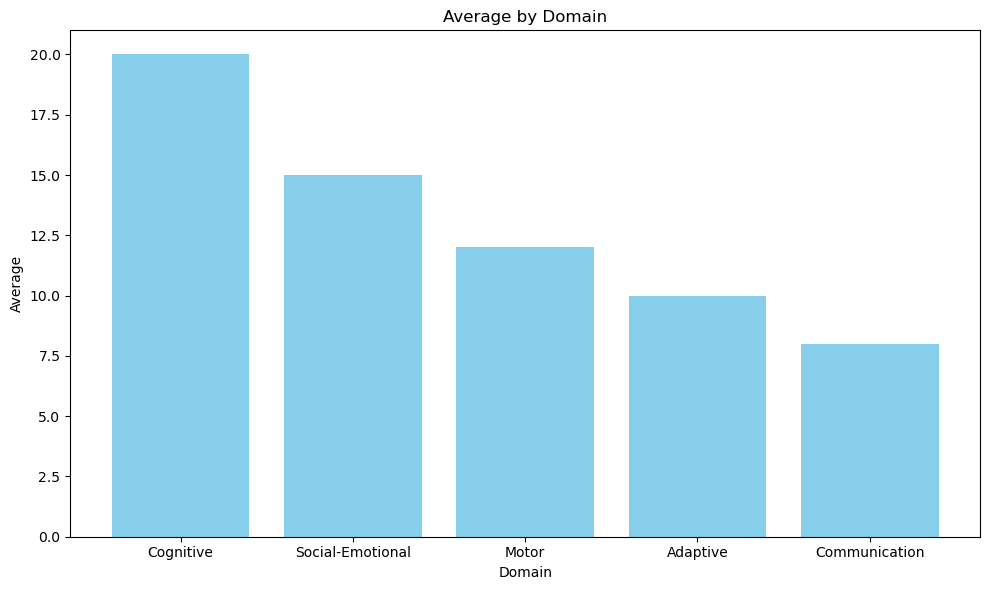

In [22]:
plt.figure(figsize=(10, 6))
plt.bar(averages_df['Domain'], averages_df['Average'], color='skyblue')
plt.xlabel('Domain')
plt.ylabel('Average')
plt.title('Average by Domain')
plt.xticks(rotation=360)
plt.tight_layout()

plt.show()

In [23]:
adaptive_domain = pd.read_csv('../data/adaptive_domain.csv')

numeric_columns = adaptive_domain.select_dtypes(include=['number'])
column_averages = numeric_columns.mean()

for column_name, average_value in column_averages.items():
    print(f"Average of {column_name}: {average_value}")



Average of Unnamed: 0: 11973.0
Average of Adaptive_Sum_of_Scaled_Scores: 11.728267680354234
Average of Adaptive_Developmental_Quotient: 86.98830360499603
Average of Adaptive_T-Score: 41.32620410209282
Average of Social-Emotional_Sum_of_Scaled_Scores: 22.773770217745643
Average of Social-Emotional_Developmental_Quotient: 94.2936013708363
Average of Social-Emotional_T-Score: 46.19747565511765
Average of Communication_Sum_of_Scaled_Scores: 13.020240883238541
Average of Communication_Developmental_Quotient: 79.06072264971563
Average of Communication_T-Score: 36.040481766477086
Average of Motor_Sum_of_Scaled_Scores: 22.871654399464703
Average of Motor_Developmental_Quotient: 93.87571094011375
Average of Cognitive_Sum_of_Scaled_Scores: 20.360779068795452
Average of Cognitive_Developmental_Quotient: 88.41218757836663
Average of BDI-3_Total_Sum_of_Scaled_Scores: 90.74614740368509
Average of BDI-3_Total_Developmental_Quotient: 87.21633165829145
Average of BDI-3_Total_T-Score: 41.64362105263158


C:\Users\iliss\AppData\Local\Temp\ipykernel_428\4278800513.py:1: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  adaptive_domain = pd.read_csv('../data/adaptive_domain.csv')


In [24]:
grouped_averages_df

,Adaptive_Average,Social_Average,Communication_Average,Motor_Average,Cognitive_Average
0,80.571429,124.363636,97.090909,94.272727,109.400000
1,112.454545,129.533333,115.363636,124.600000,127.071429
2,97.428571,115.272727,104.000000,120.636364,112.300000
3,104.000000,115.545455,98.454545,99.727273,119.400000
4,82.142857,101.636364,91.818182,94.909091,115.400000
...,...,...,...,...,...
23942,84.285714,110.000000,98.363636,91.909091,104.200000
23943,126.909091,136.266667,126.272727,135.533333,140.285714
23944,119.818182,128.133333,90.454545,126.133333,127.357143
23945,117.636364,125.600000,113.818182,134.533333,130.071429


In [83]:
selected_columns = ['Adaptive Sum of Scaled Scores', 'Adaptive Developmental Quotient', 
                    'Adaptive Percentile Rank', 'Personal-Social Sum of Scaled Scores', 
                    'Personal-Social Developmental Quotient', 'Personal-Social Percentile Rank']


In [84]:
score_columns_for_correlation = [
    'Adaptive Sum of Scaled Scores', 'Social-Emotional Sum of Scaled Scores', 
    'Communication Sum of Scaled Scores', 'Motor Sum of Scaled Scores'
]

In [85]:
print(averages_df)

             Domain  Average
4         Cognitive       20
1  Social-Emotional       15
3             Motor       12
0          Adaptive       10
2     Communication        8


In [59]:
# 6. Is there any difference in scoring noted based on evaluation type?
# Using new cleaned data from Aarons team.

# Eligibility Evaluation shows higher Developmental Quotients and Percentile Ranks, 
# while the subsequent Annual and Milestone/Exit Evaluations show higher Scaled Scores, particularly 
# in the Social-Emotional domain.

In [86]:
numeric_score_columns = [col for col in teis.columns if pd.api.types.is_numeric_dtype(teis[col])]

numeric_score_columns[:10]

['Adaptive Sum of Scaled Scores',
 'Adaptive Developmental Quotient',
 'Adaptive Percentile Rank',
 'Adaptive T-Score',
 'Social-Emotional Sum of Scaled Scores',
 'Social-Emotional Developmental Quotient',
 'Social-Emotional Percentile Rank',
 'Social-Emotional T-Score',
 'Communication Sum of Scaled Scores',
 'Communication Developmental Quotient']

In [87]:
teis = pd.read_csv('../data/teis.csv', dtype = {"Child ID" : object, "Cognitive T-Score" : object})

In [88]:
# compare the scores based on the type of evaluation: 
# Eligibility Evaluation, Annual Evaluation, and Milestone or Exit Evaluation.

eligibility_eval = teis[teis['Program Label'] == 'BDI-3 Eligibility Evaluation']
annual_eval = teis[teis['Program Label'] == 'BDI-3 Annual Evaluation']
milestone_exit_eval = teis[teis['Program Label'] == 'BDI-3 Milestone or Exit Evaluation']



In [89]:
numeric_score_columns = [col for col in numeric_score_columns if pd.api.types.is_numeric_dtype(teis[col])]

In [90]:
mean_eligibility_numeric = eligibility_eval[numeric_score_columns].mean()
mean_annual_numeric = annual_eval[numeric_score_columns].mean()
mean_milestone_exit_numeric = milestone_exit_eval[numeric_score_columns].mean()

mean_scores_comparison_numeric = pd.DataFrame({
    'Eligibility Evaluation': mean_eligibility_numeric,
    'Annual Evaluation': mean_annual_numeric,
    'Milestone/Exit Evaluation': mean_milestone_exit_numeric
})

mean_scores_comparison_numeric

,Eligibility Evaluation,Annual Evaluation,Milestone/Exit Evaluation
Adaptive Sum of Scaled Scores,10.574252,12.904847,15.047198
Adaptive Developmental Quotient,89.184238,84.604570,85.460177
Adaptive Percentile Rank,31.997580,26.487637,28.064897
Adaptive T-Score,42.791482,39.735607,40.306785
Social-Emotional Sum of Scaled Scores,21.370553,24.218261,26.386431
...,...,...,...
Code 6,NaN,NaN,NaN
Code 7,NaN,NaN,NaN
Code 8,NaN,NaN,NaN
Code 9,NaN,NaN,NaN


In [110]:
comparison_transposed = mean_scores_comparison_numeric.transpose()

In [111]:
# 7. Is there any notable pattern of scoring by region? Note: TEIS contracts with three agencies for evaluations (one per grand region) as follows:  
# * East TN, First TN and Southeast
# * Greater Nashville, Upper Cumberland, and South Central
# * Northwest, Southwest, and Memphis Delta

# Greater Nashville shows higher scores in the Adaptive and Social-Emotional domains 
#compared to other locations like First Tennessee and Memphis Delta.

In [112]:
df_cleaned = pd.read_csv('../data/teis.csv')

distinct_locations = df_cleaned['Location - Sub Level 1'].unique()


numeric_score_columns = df_cleaned.select_dtypes(include=[np.number]).columns

location_scores = df_cleaned.groupby('Location - Sub Level 1')[numeric_score_columns].mean()

distinct_locations, location_scores.head()


C:\Users\iliss\AppData\Local\Temp\ipykernel_428\2800088911.py:1: DtypeWarning: Columns (0,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cleaned = pd.read_csv('../data/teis.csv')


(array(['Southwest', 'Greater Nashville', 'First Tennessee',
        'Southeast Tennessee', 'Memphis Delta', 'Northwest',
        'Upper Cumberland', 'East Tennessee', 'South Central', nan],
       dtype=object),
                         Adaptive Sum of Scaled Scores  \
 Location - Sub Level 1                                  
 East Tennessee                              11.257439   
 First Tennessee                             10.929550   
 Greater Nashville                           12.259094   
 Memphis Delta                               11.588627   
 Northwest                                   12.173985   
 
                         Adaptive Developmental Quotient  \
 Location - Sub Level 1                                    
 East Tennessee                                86.272704   
 First Tennessee                               85.573386   
 Greater Nashville                             88.573105   
 Memphis Delta                                 85.721718   
 Northwest         

In [95]:
distinct_locations = df_cleaned['Location - Sub Level 1'].unique()

location_scores = df_cleaned.groupby('Location - Sub Level 1')[numeric_score_columns].mean()

location_scores.head()

,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,Adaptive T-Score,Social-Emotional Sum of Scaled Scores,Social-Emotional Developmental Quotient,Social-Emotional Percentile Rank,Social-Emotional T-Score,Communication Sum of Scaled Scores,Communication Developmental Quotient,...,Code 1,Code 2,Code 3,Code 4,Code 5,Code 6,Code 7,Code 8,Code 9,Code 10
Location - Sub Level 1,,,,,,,,,,,,,,,,,,,,,
East Tennessee,11.257439,86.272704,28.324968,40.854851,21.546984,91.876780,36.011908,44.580637,13.776081,81.328242,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
First Tennessee,10.929550,85.573386,27.288160,40.375734,21.402941,91.514216,34.603431,44.341176,13.678291,81.034872,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Greater Nashville,12.259094,88.573105,31.681295,42.381366,24.265618,97.785815,46.355096,48.531000,13.051493,79.154479,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Memphis Delta,11.588627,85.721718,26.925590,40.480339,23.715064,96.011192,43.349667,47.337568,12.172163,76.516490,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Northwest,12.173985,89.565866,33.840099,43.042254,24.388567,98.957746,48.615576,49.314002,13.289975,79.869925,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Figure size 2000x1000 with 0 Axes>

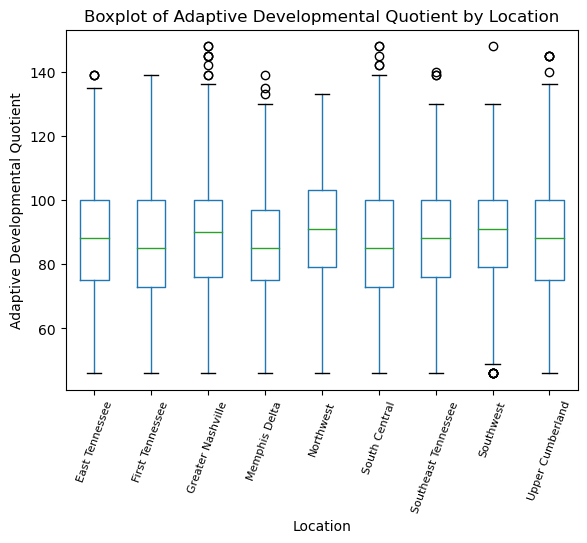

In [96]:
plt.figure(figsize=(20, 10))

selected_score_column = 'Adaptive Developmental Quotient'

df_cleaned.boxplot(column=selected_score_column, by='Location - Sub Level 1', rot=70, grid=False)

plt.title(f'Boxplot of {selected_score_column} by Location')
plt.suptitle('')
plt.xlabel('Location')
plt.ylabel(selected_score_column)
plt.xticks(fontsize=8)
plt.yticks(fontsize=10)
plt.show()


<Figure size 2000x1000 with 0 Axes>

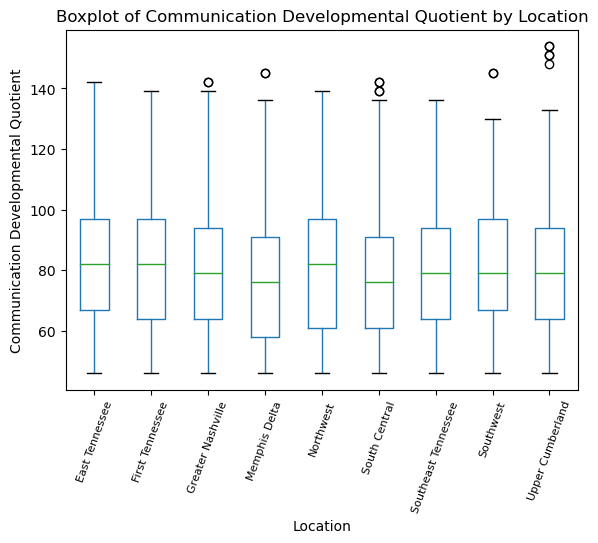

In [97]:
plt.figure(figsize=(20, 10))

selected_communication_score = 'Communication Developmental Quotient'

df_cleaned.boxplot(column=selected_communication_score, by='Location - Sub Level 1', rot=70, grid=False)

plt.title(f'Boxplot of {selected_communication_score} by Location')
plt.suptitle('')
plt.xlabel('Location')
plt.ylabel(selected_communication_score)
plt.xticks(fontsize=8)
plt.yticks(fontsize=10)
plt.show()


In [ ]:
# yesterday my notebook was fine, today about half of it is giving me errors and I don't know why so i'm trying to fix atleast the # I was working on.

In [68]:
# 8. Is there any notable pattern of scoring by evaluator?

In [123]:
examiner_columns = [col for col in df_cleaned.columns if 'Examiner' in col]

numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns
score_column_to_analyze = numeric_columns[0] if len(numeric_columns) > 0 else None

examiner_columns, score_column_to_analyze

(['Adaptive-Self Care Examiner',
  'Adaptive-Personal Responsibility Examiner',
  'Social Emotional-Adult Interaction Examiner',
  'Social Emotional-Peer Interaction Examiner',
  'Social Emotional-Self Concept / Social Role Examiner',
  'Communication-Receptive Communication Examiner',
  'Communication-Expressive Communication Examiner',
  'Motor-Gross Motor Examiner',
  'Motor-Fine Motor Examiner',
  'Motor-Perceptual Motor Examiner',
  'Cognitive-Attention and Memory Examiner',
  'Cognitive-Reasoning / Academic Skills Examiner',
  'Cognitive-Perception and Concepts Examiner'],
 'Adaptive Sum of Scaled Scores')

In [124]:
# Average score for each examiner for each score category

In [125]:
examiner_mean_scores_individual_categories = examiner_scores_melted_all.groupby(['Examiner', 'Examiner Category']).mean().reset_index()

examiner_scores_pivot = examiner_mean_scores_individual_categories.pivot(index='Examiner', 
                                                                          columns='Examiner Category', 
                                                                      values=score_column_to_analyze)

examiner_scores_pivot


Examiner Category,Adaptive-Personal Responsibility Examiner,Adaptive-Self Care Examiner,Cognitive-Attention and Memory Examiner,Cognitive-Perception and Concepts Examiner,Cognitive-Reasoning / Academic Skills Examiner,Communication-Expressive Communication Examiner,Communication-Receptive Communication Examiner,Motor-Fine Motor Examiner,Motor-Gross Motor Examiner,Motor-Perceptual Motor Examiner,Social Emotional-Adult Interaction Examiner,Social Emotional-Peer Interaction Examiner,Social Emotional-Self Concept / Social Role Examiner
Examiner,,,,,,,,,,,,,
Abby Spence,18.251142,14.087719,14.087719,14.087719,18.251142,14.087719,14.087719,14.087719,14.087719,18.251142,14.087719,18.251142,14.087719
Alexis Linville,15.921875,10.658120,10.658120,10.658120,15.921875,10.658120,10.658120,10.658120,10.658120,15.921875,10.658120,15.921875,10.658120
Alice Starnes,14.902703,11.783626,11.783626,11.783626,14.902703,11.765396,11.783626,11.783626,11.694118,14.781421,11.783626,14.902703,11.783626
Allison Coontz,11.993865,10.288732,10.288732,10.288732,11.993865,10.288732,10.288732,10.288732,10.288732,11.993865,10.288732,11.993865,10.288732
Ally Simmons,13.969072,10.722372,10.722372,10.722372,13.969072,10.722372,10.722372,10.722372,10.722372,13.969072,10.722372,13.969072,10.722372
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tiffany Maynard,14.000000,10.718391,10.718391,10.718391,14.000000,10.718391,10.718391,10.718391,10.718391,14.000000,10.718391,14.000000,10.718391
Tiffany Treadway,9.179245,8.048544,8.048544,8.048544,9.179245,8.048544,8.048544,8.048544,8.048544,9.179245,8.048544,9.179245,8.048544
Toni London,12.646154,10.552326,10.552326,10.552326,12.646154,10.552326,10.552326,10.552326,10.552326,12.646154,10.552326,12.646154,10.552326


In [117]:
# sum of all scores per examiner

examiner_sum_scores_individual_categories = examiner_scores_melted_all.groupby(['Examiner', 'Examiner Category']).sum().reset_index()

examiner_scores_sum_pivot = examiner_sum_scores_individual_categories.pivot(index='Examiner', 
                                                                            columns='Examiner Category', 
                                                                            values=score_column_to_analyze)
examiner_scores_sum_pivot.head() 


Examiner Category,Adaptive-Personal Responsibility Examiner,Adaptive-Self Care Examiner,Cognitive-Attention and Memory Examiner,Cognitive-Perception and Concepts Examiner,Cognitive-Reasoning / Academic Skills Examiner,Communication-Expressive Communication Examiner,Communication-Receptive Communication Examiner,Motor-Fine Motor Examiner,Motor-Gross Motor Examiner,Motor-Perceptual Motor Examiner,Social Emotional-Adult Interaction Examiner,Social Emotional-Peer Interaction Examiner,Social Emotional-Self Concept / Social Role Examiner
Examiner,,,,,,,,,,,,,
Abby Spence,3997.0,5621.0,5621.0,5621.0,3997.0,5621.0,5621.0,5621.0,5621.0,3997.0,5621.0,3997.0,5621.0
Alexis Linville,2038.0,3741.0,3741.0,3741.0,2038.0,3741.0,3741.0,3741.0,3741.0,2038.0,3741.0,2038.0,3741.0
Alice Starnes,2757.0,4030.0,4030.0,4030.0,2757.0,4012.0,4030.0,4030.0,3976.0,2705.0,4030.0,2757.0,4030.0
Allison Coontz,1955.0,2922.0,2922.0,2922.0,1955.0,2922.0,2922.0,2922.0,2922.0,1955.0,2922.0,1955.0,2922.0
Ally Simmons,2710.0,3978.0,3978.0,3978.0,2710.0,3978.0,3978.0,3978.0,3978.0,2710.0,3978.0,2710.0,3978.0


In [119]:
# Calculating the average score across all categories for each examiner
examiner_avg_scores = examiner_scores_sum_pivot.mean(axis=1).sort_values(ascending=False)

examiner_avg_scores_df = examiner_avg_scores.reset_index()
examiner_avg_scores_df.columns = ['Examiner', 'Average Score Across All Categories']

examiner_avg_scores_df


,Examiner,Average Score Across All Categories
0,Jasmine Jones,7538.846154
1,Kelly Bryan,5931.923077
2,Amelia Ferguson,5917.538462
3,Emily Williams,5662.692308
4,Kellie Murray,5507.692308
...,...,...
100,Sara Turner,21.153846
101,Amanda Harris,18.000000
102,Karie Quick,12.000000
103,Kendra Inman,8.000000


In [122]:
# number of exams
examiner_summary_sorted_df = examiner_summary_df.sort_values(by='Average Score Across All Categories', ascending=False)

examiner_summary_sorted_df.head()



,Examiner,Average Score Across All Categories,Number of Examinations
0,Jasmine Jones,7538.846154,5591
1,Kelly Bryan,5931.923077,5522
2,Amelia Ferguson,5917.538462,5187
3,Emily Williams,5662.692308,5501
4,Kellie Murray,5507.692308,5284


In [142]:
# Examiner Columns
potential_examiner_columns = [col for col in data_csv.columns if "examiner" in col.lower()]

# Examiner Names
def extract_examiner(row):
    for col in potential_examiner_columns:
        if pd.notnull(row[col]):
            return row[col]
    return None

data_csv['Examiner'] = data_csv.apply(extract_examiner, axis=1)

print(data_csv[['Examiner']].head())


          Examiner
0      Kelly Bryan
1       Patti Lyle
2  Karen McMillion
3   Jennifer Vines
4     Ally Simmons


In [144]:
score_columns = [col for col in data_csv.columns if "score" in col.lower() or "quotient" in col.lower() or "rank" in col.lower()]

for col in score_columns:
    data_csv[col] = pd.to_numeric(data_csv[col], errors='coerce')

melted_scores = data_csv.melt(id_vars='Examiner', value_vars=score_columns, 
                              var_name='Score_Category', value_name='Score')

# Filtering null examiners
filtered_scores = melted_scores.dropna(subset=['Score', 'Examiner'])

# mean score for each examiner across all categories
mean_scores_by_examiner = filtered_scores.groupby('Examiner')['Score'].mean().reset_index()

mean_scores_by_examiner.head()


,Examiner,Score
0,Abby Spence,42.745926
1,Alexis Linville,40.432995
2,Alice Starnes,39.900647
3,Allison Coontz,38.743985
4,Ally Simmons,39.816491


In [146]:
# number of exams for each examiner
exams_count_by_examiner = filtered_scores.groupby('Examiner').size().reset_index(name='Exams_Count')

# scores with the exams count
mean_scores_with_count = mean_scores_by_examiner.merge(exams_count_by_examiner, on='Examiner')
mean_scores_with_count.head()


,Examiner,Score,Exams_Count
0,Abby Spence,42.745926,17363
1,Alexis Linville,40.432995,13975
2,Alice Starnes,39.900647,14054
3,Allison Coontz,38.743985,11319
4,Ally Simmons,39.816491,14618


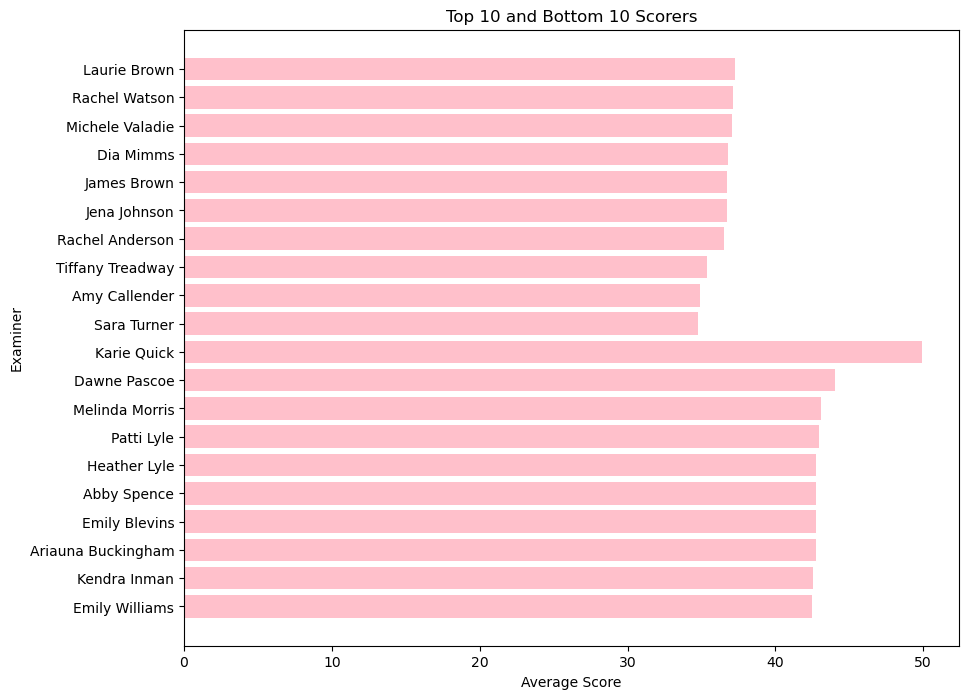

In [157]:
# examiners by their average score
sorted_scores = mean_scores_with_count.sort_values(by='Score')

# top 10 and bottom 10 examiners
top_10_scores = sorted_scores.tail(10)
bottom_10_scores = sorted_scores.head(10)

# DataFrame
combined_scores = pd.concat([top_10_scores, bottom_10_scores])

plt.figure(figsize=(10, 8))
plt.barh(combined_scores['Examiner'], combined_scores['Score'], color='pink')
plt.xlabel('Average Score')
plt.ylabel('Examiner')
plt.title('Top 10 and Bottom 10 Scorers')
plt.show()


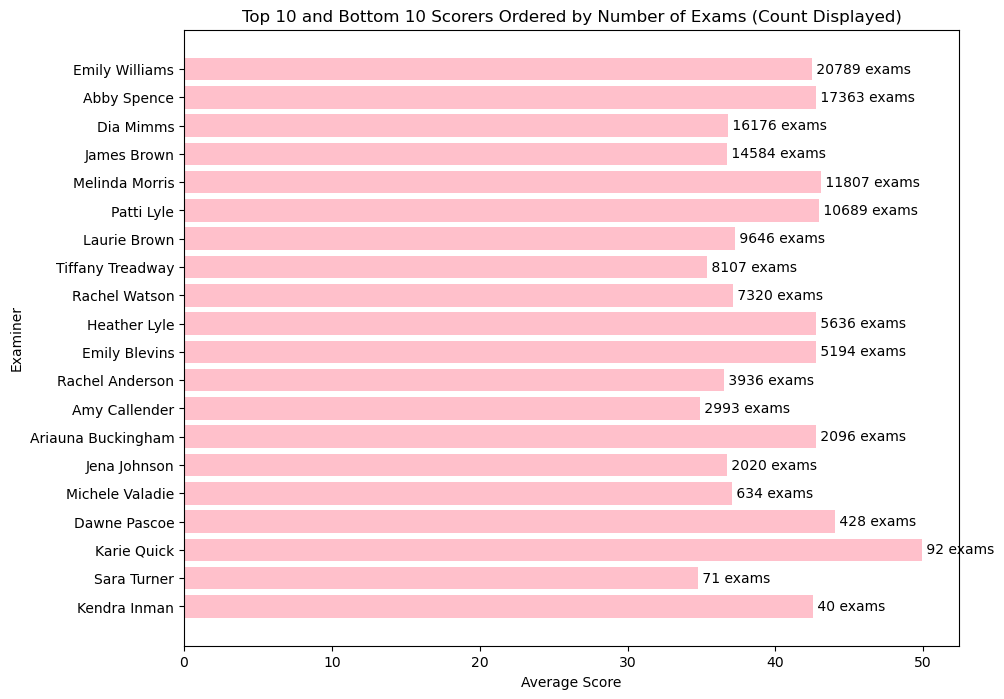

In [167]:
combined_scores_sorted_by_exams = combined_scores.sort_values(by='Exams_Count', ascending=True)

plt.figure(figsize=(10, 8))
bar_plot = plt.barh(combined_scores_sorted_by_exams['Examiner'], combined_scores_sorted_by_exams['Score'], color='pink')

for bar, exam_count in zip(bar_plot, combined_scores_sorted_by_exams['Exams_Count']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, 
             f' {exam_count} exams', va='center')

plt.xlabel('Average Score')
plt.ylabel('Examiner')
plt.title('Top 10 and Bottom 10 Scorers Ordered by Number of Exams (Count Displayed)')
plt.show()

In [175]:
teis_file_path = '../data/teis.csv'
bdi3_file_path = '../data/BDI3 All Evals for NSS 11-2023.csv'
adaptive_domain_file_path = '../data/adaptive_domain.csv'

teis_df = pd.read_csv(teis_file_path)
bdi3_df = pd.read_csv(bdi3_file_path)
adaptive_domain_df = pd.read_csv(adaptive_domain_file_path)

teis_df.head(), bdi3_df.head(), adaptive_domain_df.head()



C:\Users\iliss\AppData\Local\Temp\ipykernel_428\1101803130.py:7: DtypeWarning: Columns (0,43) have mixed types. Specify dtype option on import or set low_memory=False.
  teis_df = pd.read_csv(teis_file_path)
C:\Users\iliss\AppData\Local\Temp\ipykernel_428\1101803130.py:8: DtypeWarning: Columns (0,43) have mixed types. Specify dtype option on import or set low_memory=False.
  bdi3_df = pd.read_csv(bdi3_file_path)
C:\Users\iliss\AppData\Local\Temp\ipykernel_428\1101803130.py:9: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  adaptive_domain_df = pd.read_csv(adaptive_domain_file_path)


(  Child ID Gender Date of Birth Location - Sub Level 1  \
 0    44879      F    2022-09-27              Southwest   
 1    47795      F    2020-12-23      Greater Nashville   
 2    54340      M    2021-06-22        First Tennessee   
 3    54344      F    2022-03-07    Southeast Tennessee   
 4    54515      M    2021-11-04          Memphis Delta   
 
                   Program Label  Adaptive Sum of Scaled Scores  \
 0  BDI-3 Eligibility Evaluation                            7.0   
 1  BDI-3 Eligibility Evaluation                           16.0   
 2  BDI-3 Eligibility Evaluation                            8.0   
 3  BDI-3 Eligibility Evaluation                           13.0   
 4  BDI-3 Eligibility Evaluation                            5.0   
 
    Adaptive Developmental Quotient  Adaptive Percentile Rank  \
 0                             85.0                      16.0   
 1                             88.0                      21.0   
 2                             90.0          

In [176]:
teis_columns = teis_df.columns
bdi3_columns = bdi3_df.columns

examiner_columns_teis = [col for col in teis_columns if "examiner" in col.lower()]
examiner_columns_bdi3 = [col for col in bdi3_columns if "examiner" in col.lower()]
score_columns_teis = [col for col in teis_columns if "score" in col.lower()]
score_columns_bdi3 = [col for col in bdi3_columns if "score" in col.lower()]

examiner_columns_teis, examiner_columns_bdi3, score_columns_teis, score_columns_bdi3


(['Adaptive-Self Care Examiner',
  'Adaptive-Personal Responsibility Examiner',
  'Social Emotional-Adult Interaction Examiner',
  'Social Emotional-Peer Interaction Examiner',
  'Social Emotional-Self Concept / Social Role Examiner',
  'Communication-Receptive Communication Examiner',
  'Communication-Expressive Communication Examiner',
  'Motor-Gross Motor Examiner',
  'Motor-Fine Motor Examiner',
  'Motor-Perceptual Motor Examiner',
  'Cognitive-Attention and Memory Examiner',
  'Cognitive-Reasoning / Academic Skills Examiner',
  'Cognitive-Perception and Concepts Examiner'],
 ['Adaptive-Self Care Examiner',
  'Adaptive-Personal Responsibility Examiner',
  'Social Emotional-Adult Interaction Examiner',
  'Social Emotional-Peer Interaction Examiner',
  'Social Emotional-Self Concept / Social Role Examiner',
  'Communication-Receptive Communication Examiner',
  'Communication-Expressive Communication Examiner',
  'Motor-Gross Motor Examiner',
  'Motor-Fine Motor Examiner',
  'Motor-Pe

In [178]:
# Inspecting the melted_data DataFrame to understand its structure and verify the 'Score' column
melted_data.head()


,Examiner,Score_Category,Score
0,Kelly Bryan,Adaptive Sum of Scaled Scores,7.0
1,Patti Lyle,Adaptive Sum of Scaled Scores,16.0
2,Karen McMillion,Adaptive Sum of Scaled Scores,8.0
3,Jennifer Vines,Adaptive Sum of Scaled Scores,13.0
4,Ally Simmons,Adaptive Sum of Scaled Scores,5.0


In [182]:
# column to a numeric type
melted_data['Score'] = pd.to_numeric(melted_data['Score'], errors='coerce')

melted_data.dropna(subset=['Score', 'Examiner'], inplace=True)

# average scores by examiner and score category
avg_scores_by_examiner = melted_data.groupby(['Score_Category', 'Examiner'])['Score'].mean().reset_index()

# Sorting to find the top 5 examiners for each score category
top_examiners_by_category = avg_scores_by_examiner.groupby('Score_Category').apply(lambda x: x.nlargest(5, 'Score')).reset_index(drop=True)

top_examiners_by_category


,Score_Category,Examiner,Score
0,Adaptive Sum of Scaled Scores,Jasmine Jones,16.978022
1,Adaptive Sum of Scaled Scores,Anna Koon,16.428571
2,Adaptive Sum of Scaled Scores,Jennifer Terranera,16.208333
3,Adaptive Sum of Scaled Scores,Krista Warren,15.061728
4,Adaptive Sum of Scaled Scores,Meredith Koffman,14.718644
...,...,...,...
60,Social-Emotional Z-Score,Karie Quick,1.500000
61,Social-Emotional Z-Score,Kendra Inman,1.200000
62,Social-Emotional Z-Score,Jasmine Jones,1.194071
63,Social-Emotional Z-Score,Dawne Pascoe,1.157500


C:\Users\iliss\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\iliss\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\iliss\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\iliss\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


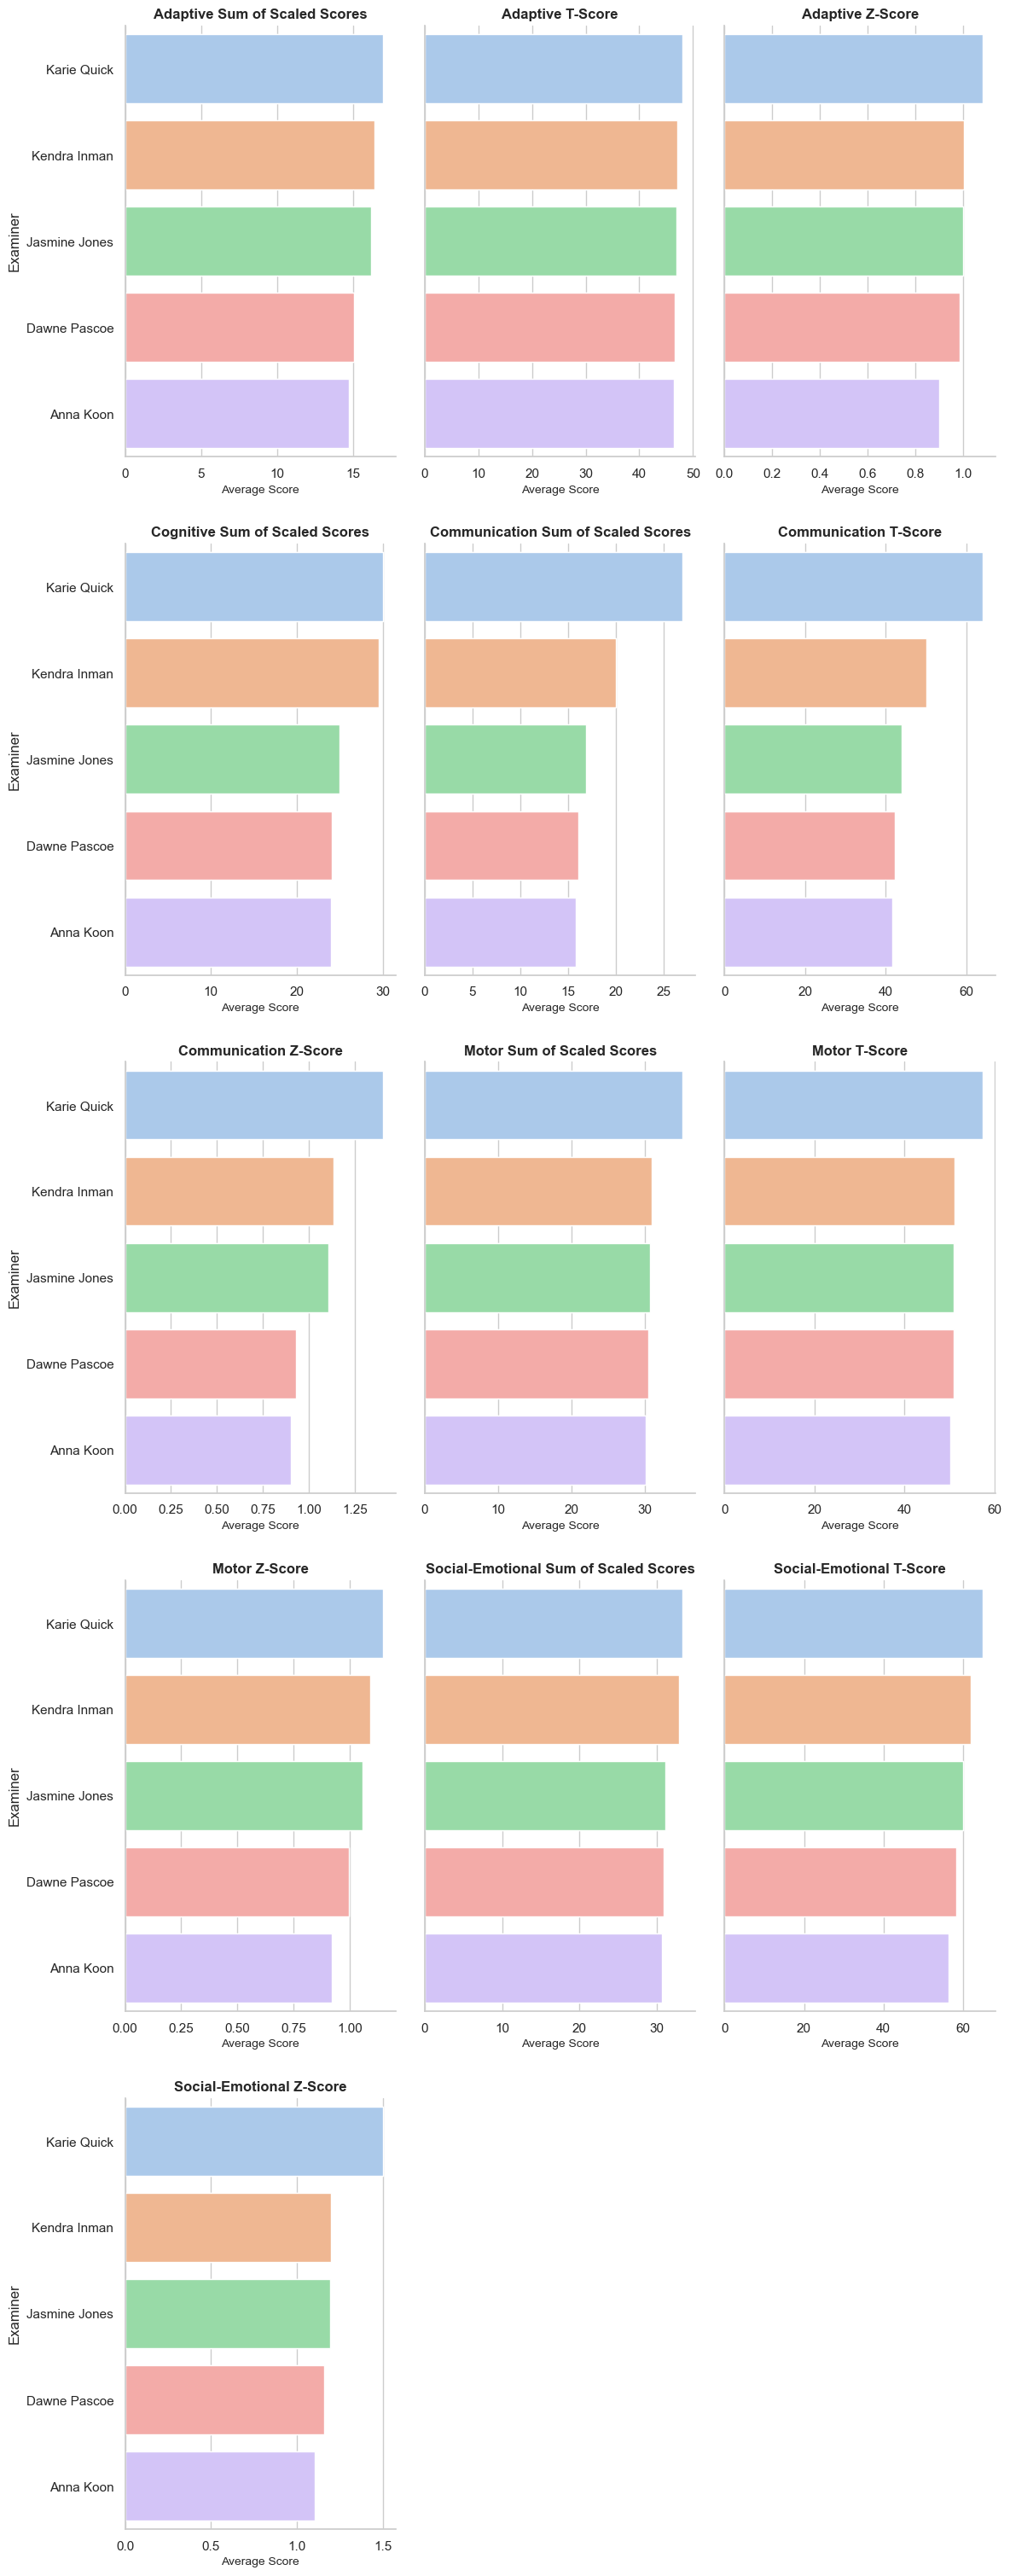

In [206]:
g = sns.FacetGrid(top_examiners_by_category, col='Score_Category', col_wrap=3, sharex=False, height=4)

g.map(sns.barplot, 'Score', 'Examiner', palette='viridis')
g.map(sns.barplot, 'Score', 'Examiner', palette='pastel')

g.set_titles(col_template="{col_name}", fontweight='bold', fontsize=10)

g.fig.subplots_adjust(top=1.5) 

for axes in g.axes.flatten():
    axes.set_xlabel('Average Score', fontsize=10)
    axes.set_ylabel('Examiner', fontsize=12)
    axes.tick_params(labelrotation=360)

plt.show()
# Top 5 examiners based on category score

C:\Users\iliss\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\iliss\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


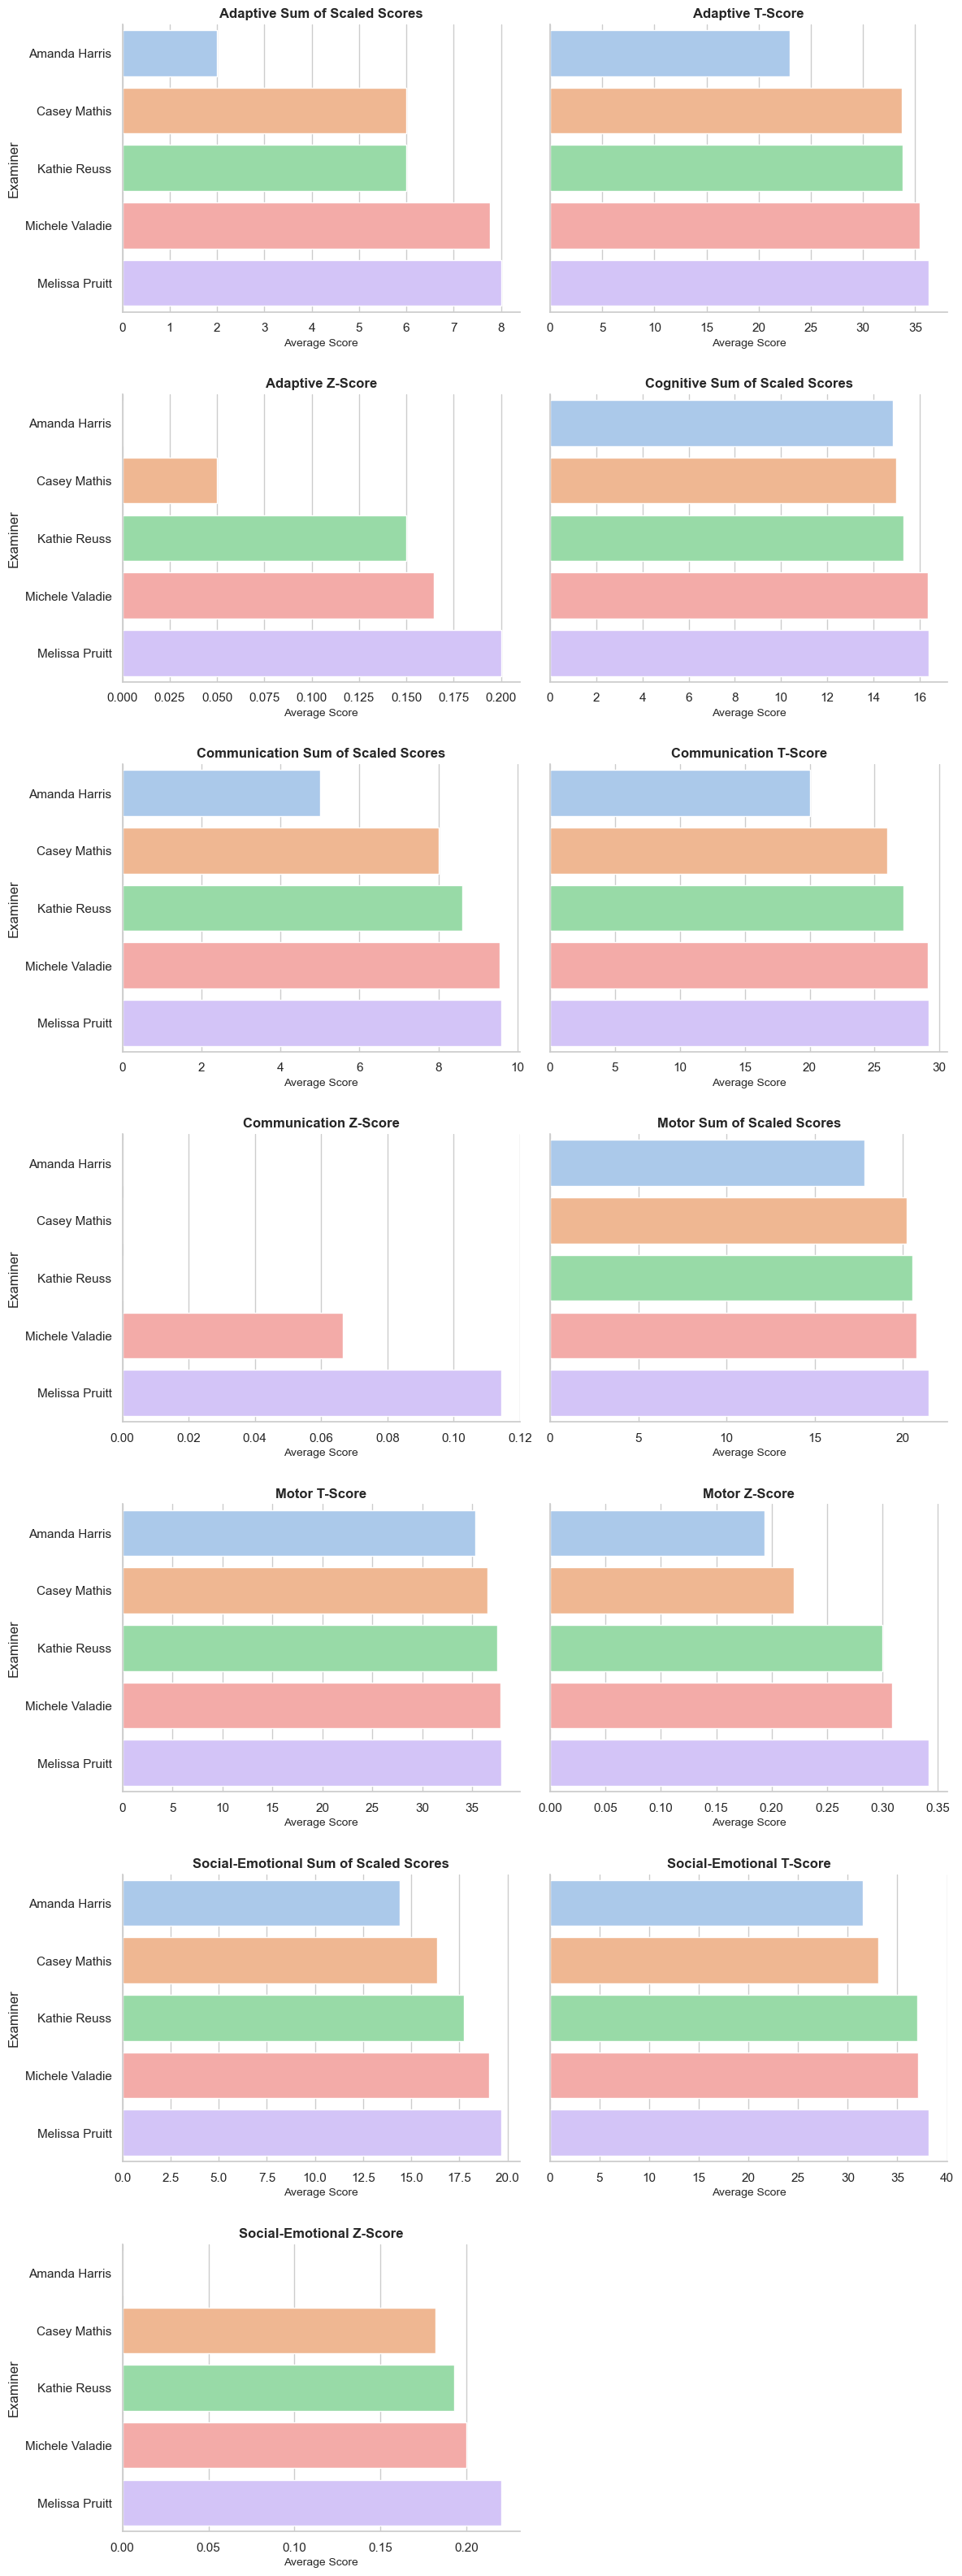

In [211]:
# bottom 5 examiners, making it more compact
g = sns.FacetGrid(bottom_examiners_by_category, col='Score_Category', col_wrap=2, sharex=False, height=3, aspect=2)

g.map(sns.barplot, 'Score', 'Examiner', palette='pastel')

g.set_titles(col_template="{col_name}", fontweight='bold', fontsize=10)

g.fig.subplots_adjust(top=1.5) 

for axes in g.axes.flatten():
    axes.set_xlabel('Average Score', fontsize=10)
    axes.set_ylabel('Examiner', fontsize=12)
    axes.tick_params(labelrotation=360)

plt.show()



In [25]:

examiner_results = pd.DataFrame()

for examiner_col in examiner_columns:
    filtered_data = new_data[new_data[examiner_col].notna()]

    examiner_averages = filtered_data.groupby(examiner_col)[score_columns].agg(['mean', 'count'])
    examiner_averages.columns = ['_'.join(col).strip() for col in examiner_averages.columns.values]

    examiner_averages.reset_index(inplace=True)
    examiner_averages.rename(columns={examiner_col: 'Examiner Name'}, inplace=True)

    examiner_results = pd.concat([examiner_results, examiner_averages], ignore_index=True)

examiner_results.drop_duplicates(subset=['Examiner Name'], inplace=True)

examiner_results


,Examiner Name,Adaptive Sum of Scaled Scores_mean,Adaptive Sum of Scaled Scores_count,Adaptive T-Score_mean,Adaptive T-Score_count,Social-Emotional Sum of Scaled Scores_mean,Social-Emotional Sum of Scaled Scores_count,Social-Emotional T-Score_mean,Social-Emotional T-Score_count,Communication Sum of Scaled Scores_mean,...,Motor-Fine Motor T-Score_mean,Motor-Fine Motor T-Score_count,Motor-Perceptual Motor T-Score_mean,Motor-Perceptual Motor T-Score_count,Cognitive-Attention and Memory T-Score_mean,Cognitive-Attention and Memory T-Score_count,Cognitive-Reasoning / Academic Skills T-Score_mean,Cognitive-Reasoning / Academic Skills T-Score_count,Cognitive-Perception and Concepts T-Score_mean,Cognitive-Perception and Concepts T-Score_count
0,Abby Spence,14.087719,399,46.598997,399,26.857143,399,52.839599,399,14.508772,...,52.077694,399,47.840183,219,47.952381,399,43.269406,219,44.531328,399
1,Alexis Linville,10.658120,351,42.037037,351,20.088319,351,44.108262,351,13.051282,...,51.085470,351,44.734375,128,44.481481,351,42.976562,128,46.655271,351
2,Alice Starnes,11.783626,342,41.567251,342,22.634503,342,46.005848,342,13.049853,...,48.081871,342,47.420765,183,42.178363,342,41.897297,185,42.862573,342
3,Allison Coontz,10.288732,284,37.971831,284,23.806338,284,47.292254,284,11.683099,...,45.186620,284,40.202454,163,42.838028,284,41.785276,163,38.616197,284
4,Ally Simmons,10.722372,371,39.175202,371,20.415094,371,42.784367,371,13.264151,...,46.331536,371,43.711340,194,46.525606,371,41.087629,194,42.153639,371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,Tiffany Maynard,10.718391,348,40.971264,348,21.663793,348,46.022989,348,13.204023,...,48.862069,348,45.273885,157,39.827586,348,41.452229,157,42.215517,348
101,Tiffany Treadway,8.048544,206,33.757282,206,14.359223,206,33.087379,206,10.694175,...,47.349515,206,44.669811,106,42.291262,206,35.330189,106,39.640777,206
102,Toni London,10.552326,344,38.508721,344,20.680233,344,42.421512,344,12.406977,...,47.345930,344,42.666667,195,43.279070,344,46.523077,195,41.180233,344
103,Tracey Hardiman,10.723913,460,41.434783,460,23.089325,459,48.962963,459,13.616228,...,49.376368,457,46.055556,180,51.074236,458,44.393443,183,45.238512,457


In [26]:
# columns for mean scores and exam counts
mean_score_columns = [col for col in examiner_results.columns if 'mean' in col]
count_columns = [col for col in examiner_results.columns if 'count' in col]

# combined average score for each examiner
examiner_results['Combined Average Score'] = examiner_results[mean_score_columns].mean(axis=1)

# total number of exams given by each examiner
examiner_results['Total Number of Exams'] = examiner_results[count_columns].sum(axis=1)

examiner_results[['Examiner Name', 'Combined Average Score', 'Total Number of Exams']].head()


,Examiner Name,Combined Average Score,Total Number of Exams
0,Abby Spence,43.840910,8457
1,Alexis Linville,39.597876,7180
2,Alice Starnes,39.564897,7212
3,Allison Coontz,37.707751,6048
4,Ally Simmons,38.518599,7825


In [27]:
# Selecting the top 10 and bottom 10 scored examiners based on their combined average score

# Sorting the DataFrame by the combined average score
examiner_results_sorted = examiner_results.sort_values(by='Combined Average Score', ascending=False)

# Selecting the top 10 and bottom 10 examiners
top_10_examiners = examiner_results_sorted.head(10)
bottom_10_examiners = examiner_results_sorted.tail(10)

# Displaying the results for the top 10 and bottom 10 scored examiners
top_10_examiners[['Examiner Name', 'Combined Average Score', 'Total Number of Exams']], bottom_10_examiners[['Examiner Name', 'Combined Average Score', 'Total Number of Exams']]


(         Examiner Name  Combined Average Score  Total Number of Exams
 54         Karie Quick               52.236842                     38
 29        Dawne Pascoe               45.252174                    210
 12           Anna Koon               44.766046                    157
 75      Melinda Morris               44.133300                   5718
 0          Abby Spence               43.840910                   8457
 43       Jasmine Jones               43.707720                  10141
 34       Emily Blevins               43.661856                   2528
 11           Ann Ellis               43.447893                   3805
 35      Emily Williams               43.317526                  10271
 14  Ariauna Buckingham               43.256433                   1019,
         Examiner Name  Combined Average Score  Total Number of Exams
 81      Mikayla Jones               35.785707                   2900
 89      Rachel Watson               35.733983                   3942
 88    R

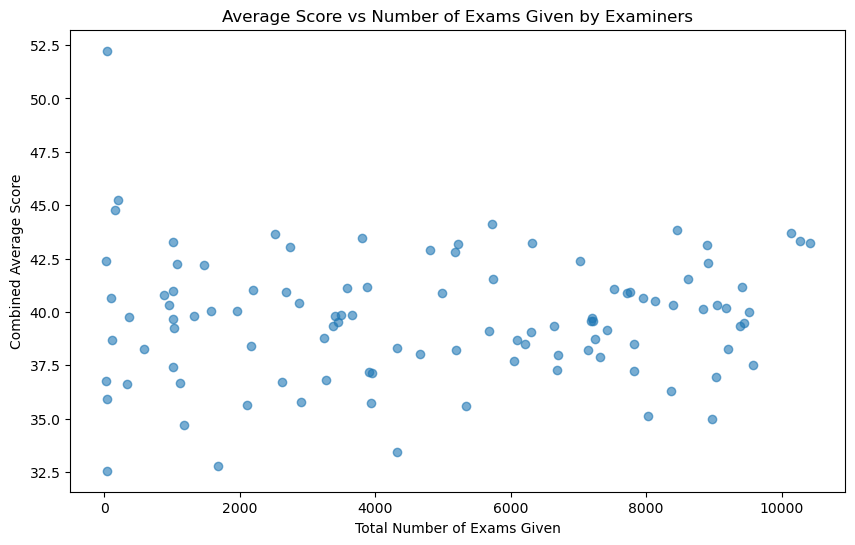

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(examiner_results['Total Number of Exams'], examiner_results['Combined Average Score'], alpha=0.6)

plt.xlabel('Total Number of Exams Given')
plt.ylabel('Combined Average Score')
plt.title('Average Score vs Number of Exams Given by Examiners')

plt.show()


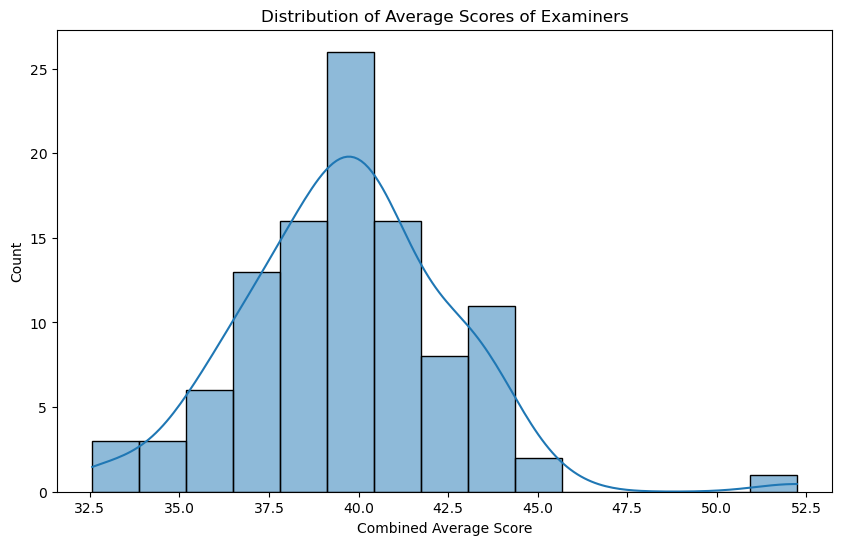

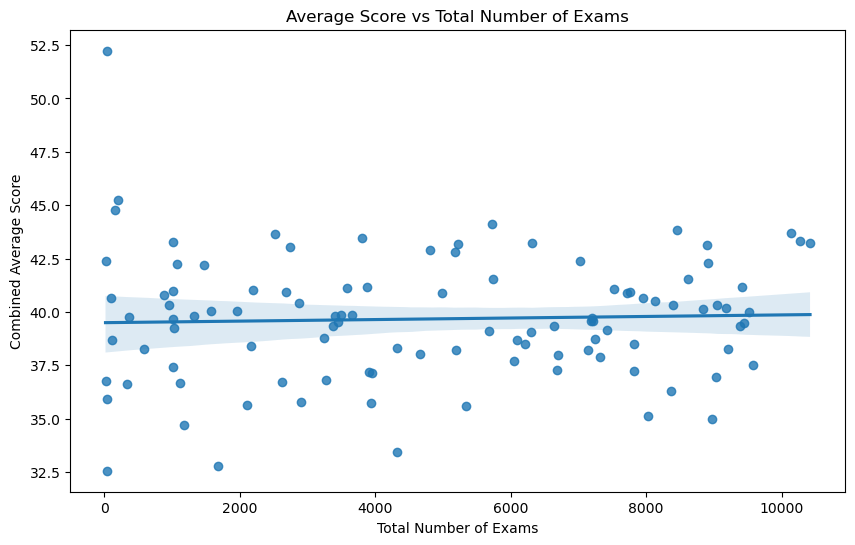

In [35]:
#Distribution of average scores
plt.figure(figsize=(10, 6))
plt.title('Distribution of Average Scores of Examiners')
sns.histplot(examiner_results['Combined Average Score'], kde=True)
plt.xlabel('Combined Average Score')
plt.show()

# Scatter plot of average score vs total exams with a regression line
plt.figure(figsize=(10, 6))
plt.title('Average Score vs Total Number of Exams')
sns.regplot(x='Total Number of Exams', y='Combined Average Score', data=examiner_results)
plt.xlabel('Total Number of Exams')
plt.ylabel('Combined Average Score')
plt.show()


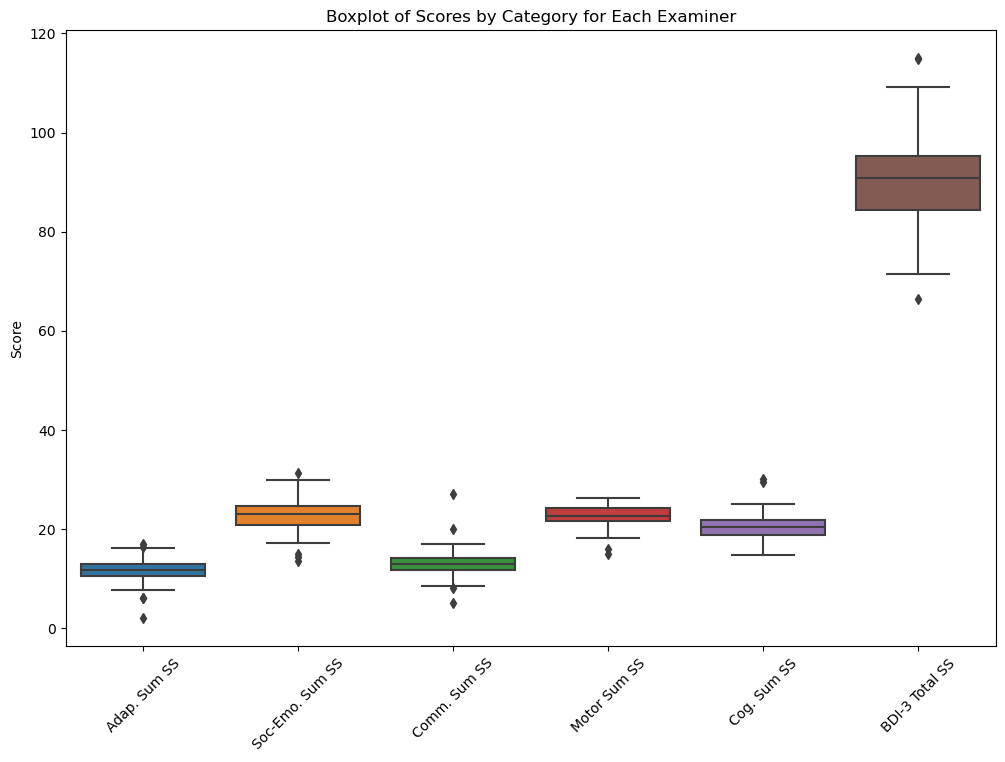

In [31]:
abbreviated_categories_manual = {
    'Adaptive Sum of Scaled Scores_mean': 'Adap. Sum SS',
    'Social-Emotional Sum of Scaled Scores_mean': 'Soc-Emo. Sum SS',
    'Communication Sum of Scaled Scores_mean': 'Comm. Sum SS',
    'Motor Sum of Scaled Scores_mean': 'Motor Sum SS',
    'Cognitive Sum of Scaled Scores_mean': 'Cog. Sum SS',
    'BDI-3 Total Sum of Scaled Scores_mean': 'BDI-3 Total SS'
}

examiner_results_abbreviated = examiner_results.rename(columns=abbreviated_categories_manual)

score_columns_abbreviated = list(abbreviated_categories_manual.values())

plt.figure(figsize=(12, 8))
plt.title('Boxplot of Scores by Category for Each Examiner')
sns.boxplot(data=examiner_results_abbreviated[score_columns_abbreviated])
plt.xticks(rotation=45)
plt.ylabel('Score')
plt.show()


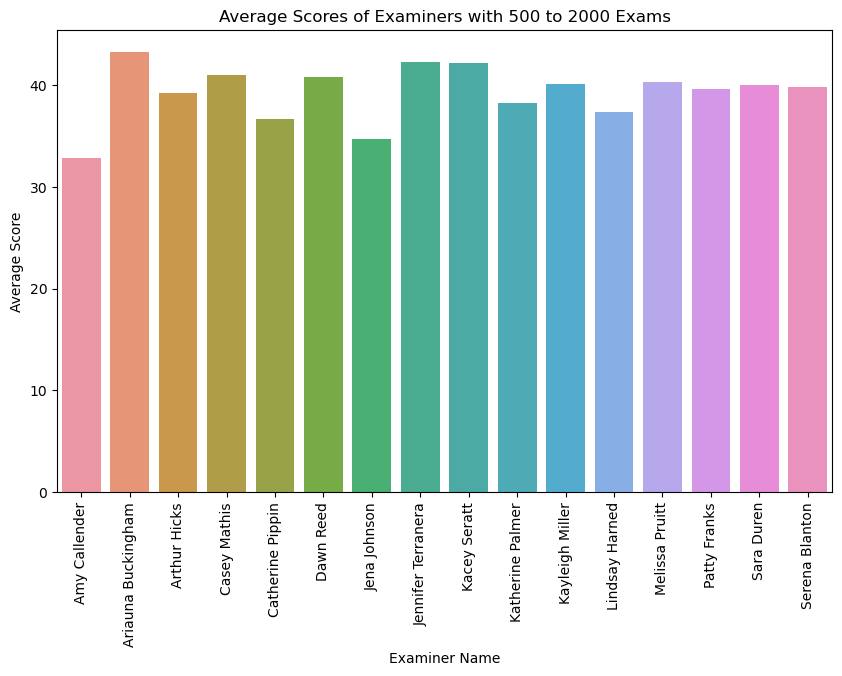

In [36]:

examiners_more_than_2000 = examiner_results[examiner_results['Total Number of Exams'] > 2000]
examiners_between_500_and_2000 = examiner_results[(examiner_results['Total Number of Exams'] <= 2000) & (examiner_results['Total Number of Exams'] > 500)]

plt.figure(figsize=(10, 6))
plt.title('Average Scores of Examiners with 500 to 2000 Exams')
sns.barplot(x='Examiner Name', y='Combined Average Score', data=examiners_between_500_and_2000)
plt.xticks(rotation=90)
plt.ylabel('Average Score')
plt.show()


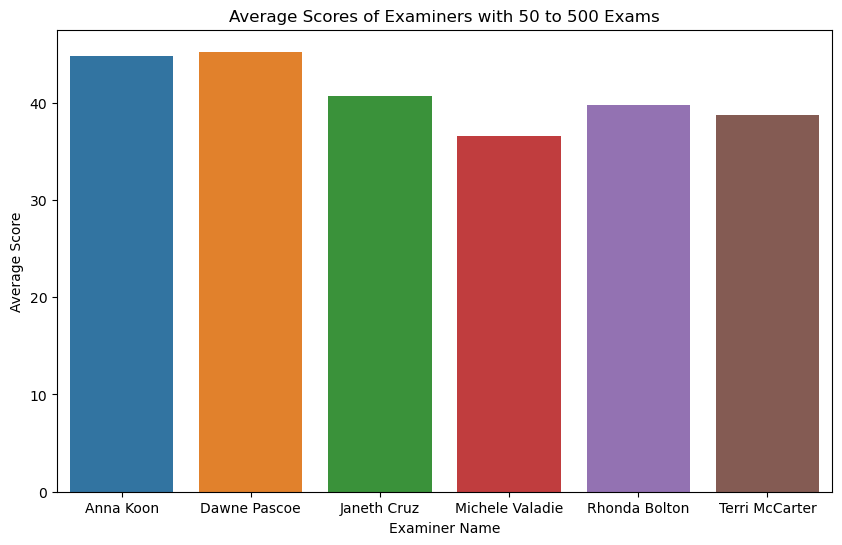

In [39]:

examiners_between_50_and_500 = examiner_results[(examiner_results['Total Number of Exams'] <= 500) & (examiner_results['Total Number of Exams'] >= 50)]

plt.figure(figsize=(10, 6))
plt.title('Average Scores of Examiners with 50 to 500 Exams')
sns.barplot(x='Examiner Name', y='Combined Average Score', data=examiners_between_50_and_500)
plt.xticks(rotation=360)
plt.ylabel('Average Score')
plt.show()



In [ ]:
# The boxplot of scores across different categories indicates a wide range of scoring behaviors among evaluators.
# Some categories show greater variability in scores than others, suggesting that certain assessment areas might be more 
# subjectively evaluated.


# Volume of Exams vs. Average Score: The scatter plot and bar plots reveal that the volume of exams conducted by an 
# evaluator does not necessarily correlate with higher or lower average scores. Examiners with a high number of exams show a 
# spread of average scores, similar to those with fewer exams.


# For examiners administering between 50 to 500 exams, there is a notable diversity in average 
# scores. This suggests that within this range of activity, examiners' scoring patterns vary significantly.

# This implys that scoring patterns are influenced by a variety of factors and do not strictly align with the 
# number of exams conducted. The diversity in scoring across different examiners and categories underscores the complexity of 
# the evaluation process.

In [ ]:
# This implys that scoring patterns are influenced by a variety of factors and do not strictly align with the 
# number of exams conducted. The diversity in scoring across different examiners and categories underscores the complexity of 
# No Clear Correlation Between Volume and Average Score
# Performance in terms of average score is not necessarily linked to the number 
#of exams given.

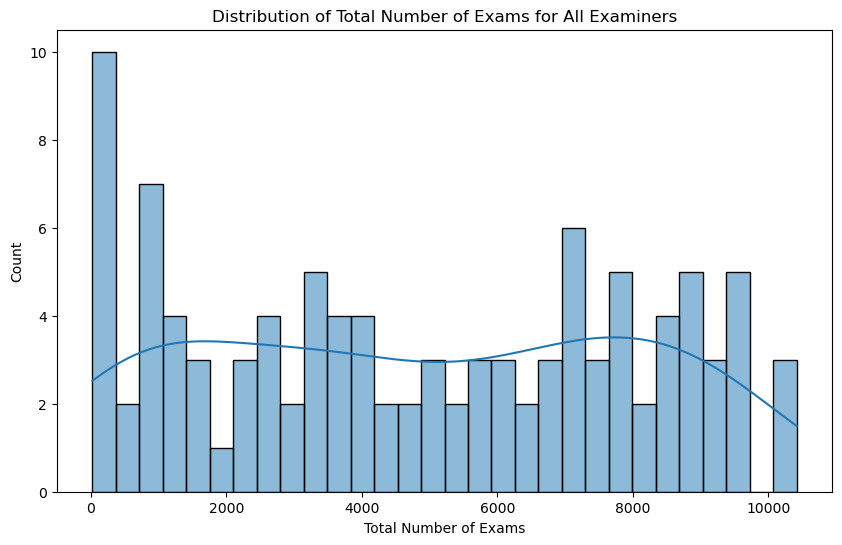

In [40]:
plt.figure(figsize=(10, 6))
plt.title('Distribution of Total Number of Exams for All Examiners')
sns.histplot(examiner_results['Total Number of Exams'], bins=30, kde=True)
plt.xlabel('Total Number of Exams')
plt.show()

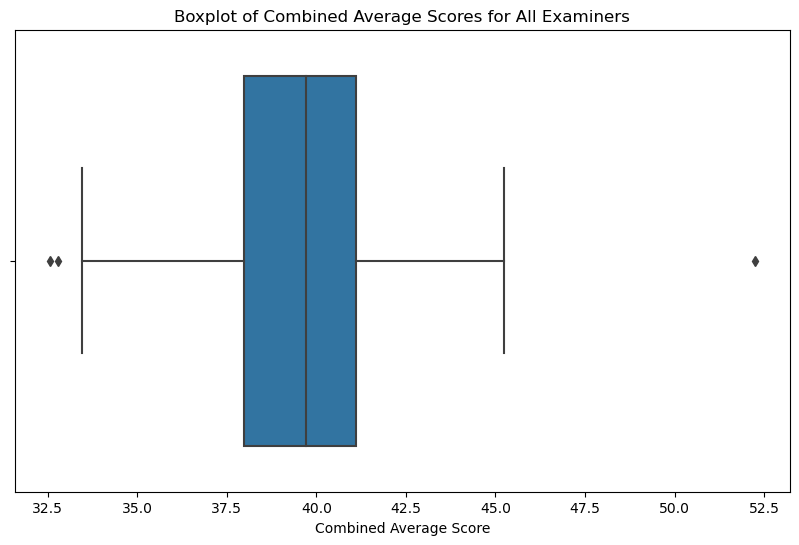

In [41]:
plt.figure(figsize=(10, 6))
plt.title('Boxplot of Combined Average Scores for All Examiners')
sns.boxplot(x=examiner_results['Combined Average Score'])
plt.xlabel('Combined Average Score')
plt.show()

In [ ]:
# The boxplot provides a summary of the combined average scores of all examiners, showcasing the median, quartiles, and 
#potential outliers. This plot gives a quick overview of the distribution of average scores, indicating the overall scoring 
#pattern among the examiners.

In [46]:
examiner_results

,Examiner Name,Adaptive Sum of Scaled Scores_mean,Adaptive Sum of Scaled Scores_count,Adaptive T-Score_mean,Adaptive T-Score_count,Social-Emotional Sum of Scaled Scores_mean,Social-Emotional Sum of Scaled Scores_count,Social-Emotional T-Score_mean,Social-Emotional T-Score_count,Communication Sum of Scaled Scores_mean,...,Motor-Perceptual Motor T-Score_count,Cognitive-Attention and Memory T-Score_mean,Cognitive-Attention and Memory T-Score_count,Cognitive-Reasoning / Academic Skills T-Score_mean,Cognitive-Reasoning / Academic Skills T-Score_count,Cognitive-Perception and Concepts T-Score_mean,Cognitive-Perception and Concepts T-Score_count,Combined Average Score,Total Number of Exams,Examiner Initials
0,Abby Spence,14.087719,399,46.598997,399,26.857143,399,52.839599,399,14.508772,...,219,47.952381,399,43.269406,219,44.531328,399,43.840910,8457,AS
1,Alexis Linville,10.658120,351,42.037037,351,20.088319,351,44.108262,351,13.051282,...,128,44.481481,351,42.976562,128,46.655271,351,39.597876,7180,AL
2,Alice Starnes,11.783626,342,41.567251,342,22.634503,342,46.005848,342,13.049853,...,183,42.178363,342,41.897297,185,42.862573,342,39.564897,7212,AS
3,Allison Coontz,10.288732,284,37.971831,284,23.806338,284,47.292254,284,11.683099,...,163,42.838028,284,41.785276,163,38.616197,284,37.707751,6048,AC
4,Ally Simmons,10.722372,371,39.175202,371,20.415094,371,42.784367,371,13.264151,...,194,46.525606,371,41.087629,194,42.153639,371,38.518599,7825,AS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,Tiffany Maynard,10.718391,348,40.971264,348,21.663793,348,46.022989,348,13.204023,...,157,39.827586,348,41.452229,157,42.215517,348,38.753066,7239,TM
101,Tiffany Treadway,8.048544,206,33.757282,206,14.359223,206,33.087379,206,10.694175,...,106,42.291262,206,35.330189,106,39.640777,206,33.453280,4328,TT
102,Toni London,10.552326,344,38.508721,344,20.680233,344,42.421512,344,12.406977,...,195,43.279070,344,46.523077,195,41.180233,344,37.892920,7314,TL
103,Tracey Hardiman,10.723913,460,41.434783,460,23.089325,459,48.962963,459,13.616228,...,180,51.074236,458,44.393443,183,45.238512,457,41.153582,9412,TH


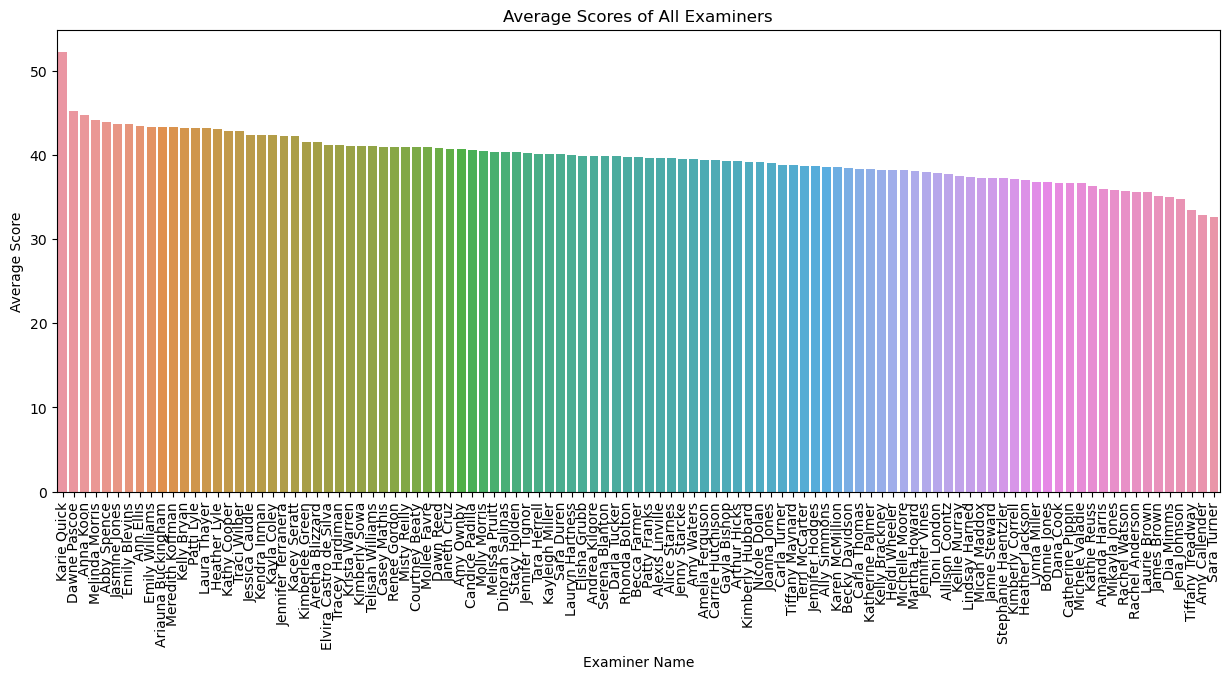

In [42]:
plt.figure(figsize=(15, 6))
plt.title('Average Scores of All Examiners')
sns.barplot(x='Examiner Name', y='Combined Average Score', data=examiner_results.sort_values(by='Combined Average Score', ascending=False))
plt.xticks(rotation=90)
plt.ylabel('Average Score')
plt.show()

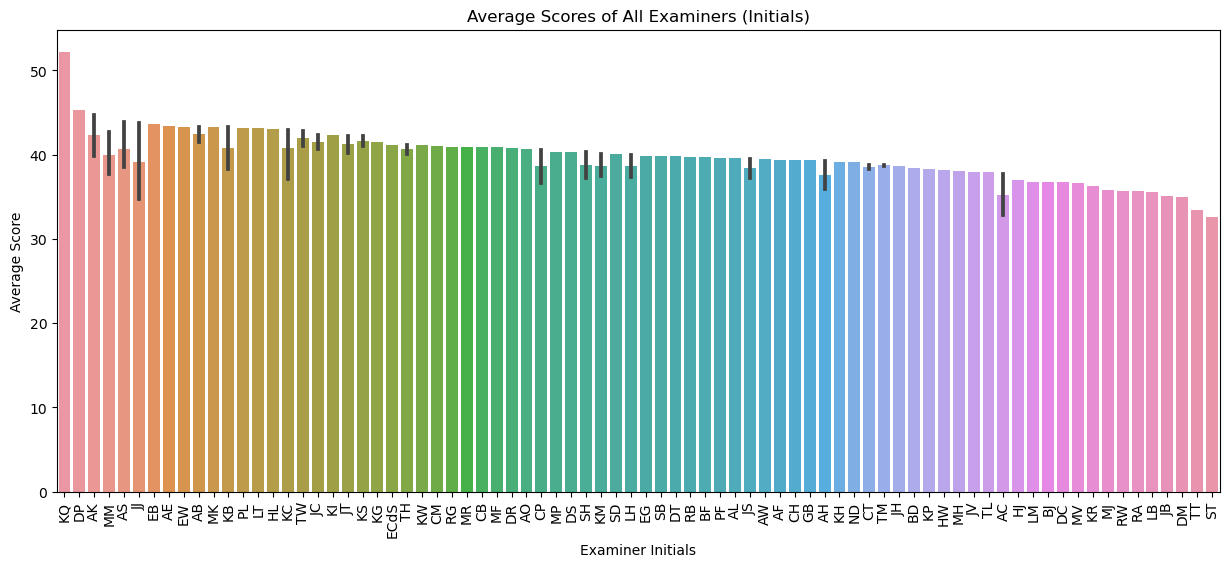

In [43]:
def name_to_initials(name):
    parts = name.split()
    initials = ''.join([part[0] for part in parts])
    return initials

examiner_results['Examiner Initials'] = examiner_results['Examiner Name'].apply(name_to_initials)

plt.figure(figsize=(15, 6))
plt.title('Average Scores of All Examiners (Initials)')
sns.barplot(x='Examiner Initials', y='Combined Average Score', data=examiner_results.sort_values(by='Combined Average Score', ascending=False))
plt.xticks(rotation=90)
plt.ylabel('Average Score')
plt.show()


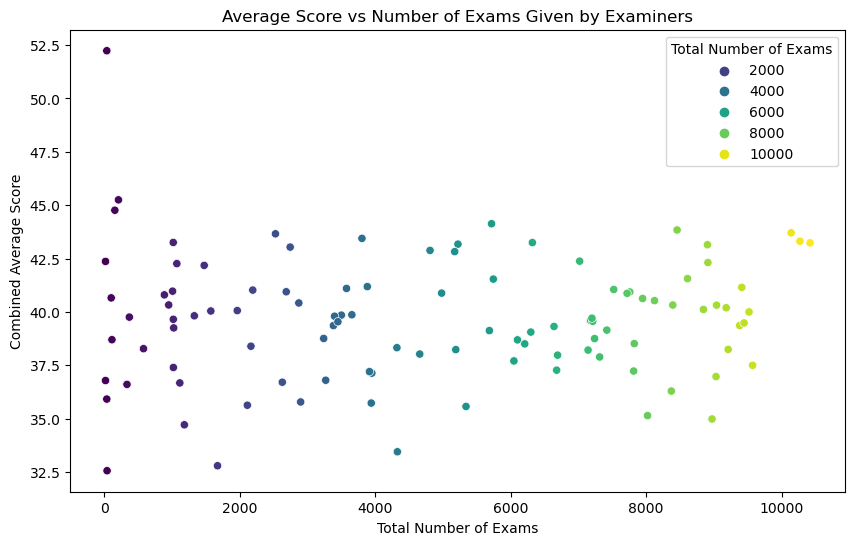

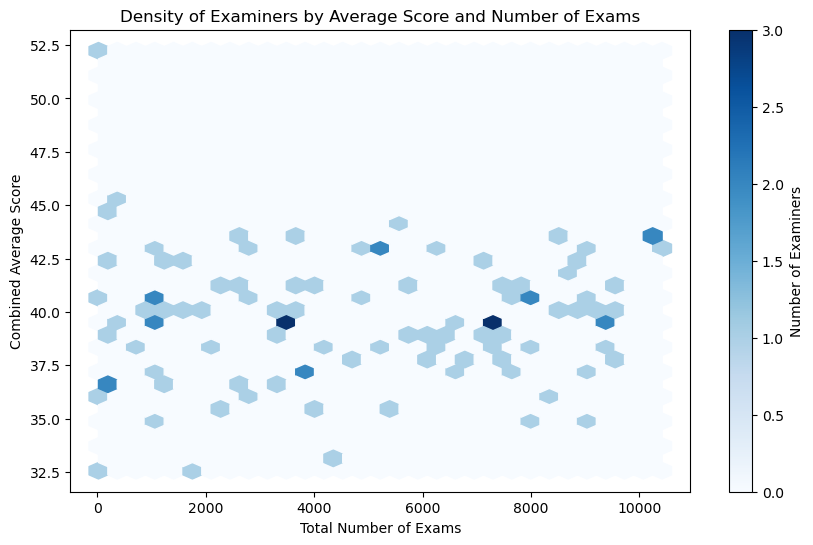

In [45]:
plt.figure(figsize=(10, 6))
plt.title('Average Score vs Number of Exams Given by Examiners')
sns.scatterplot(x='Total Number of Exams', y='Combined Average Score', hue='Total Number of Exams', data=examiner_results, palette='viridis')
plt.xlabel('Total Number of Exams')
plt.ylabel('Combined Average Score')
plt.show()

plt.figure(figsize=(10, 6))
plt.title('Density of Examiners by Average Score and Number of Exams')
plt.hexbin(examiner_results['Total Number of Exams'], examiner_results['Combined Average Score'], gridsize=30, cmap='Blues')
plt.colorbar(label='Number of Examiners')
plt.xlabel('Total Number of Exams')
plt.ylabel('Combined Average Score')
plt.show()

In [ ]:
# No Clear Correlation Between Volume and Average Score
# Performance in terms of average score is not necessarily linked to the number 
#of exams given.

C:\Users\iliss\AppData\Local\Temp\ipykernel_15076\2251227104.py:1: DtypeWarning: Columns (0,43) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv('../data/teis.csv')


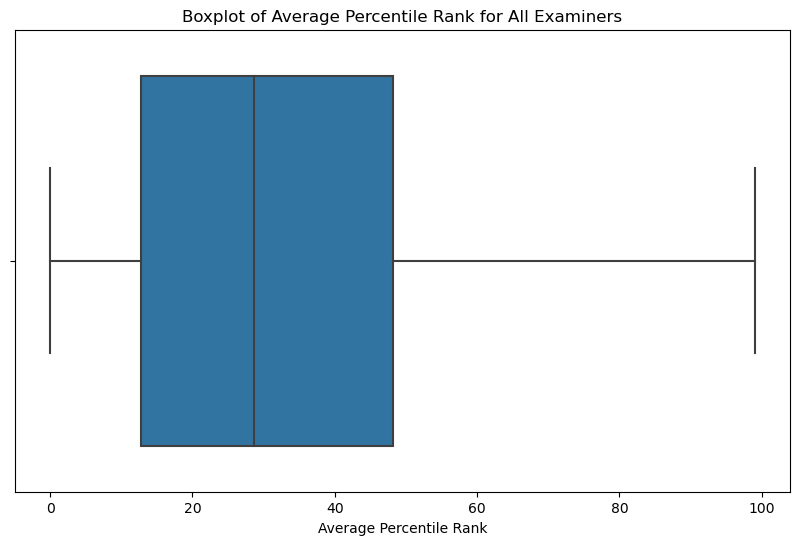

In [56]:
data_df = pd.read_csv('../data/teis.csv')

percentile_columns = [col for col in data_df.columns if 'Percentile Rank' in col]
data_df['Average Percentile Rank'] = data_df[percentile_columns].mean(axis=1)

plt.figure(figsize=(10, 6))
plt.title('Boxplot of Average Percentile Rank for All Examiners')
sns.boxplot(x=data_df['Average Percentile Rank'], showfliers=False)
plt.xlabel('Average Percentile Rank')
plt.show()




In [60]:

file_path = '../data/teis.csv'
data = pd.read_csv(file_path)

data.head()

examiner_counts = data[examiner_columns].apply(pd.Series.value_counts).fillna(0)

examiner_total_counts = examiner_counts.sum(axis=1)

total_exams = examiner_total_counts.sum()

examiner_total_counts, total_exams


C:\Users\iliss\AppData\Local\Temp\ipykernel_15076\3938633453.py:2: DtypeWarning: Columns (0,43) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


(Abby Spence         4467.0
 Alexis Linville     3671.0
 Alice Starnes       3813.0
 Allison Coontz      3208.0
 Ally Simmons        4115.0
                      ...  
 Tiffany Maynard     3760.0
 Tiffany Treadway    2278.0
 Toni London         3876.0
 Tracey Hardiman     4862.0
 Traci Wilber        2834.0
 Length: 105, dtype: float64,
 267892.0)

In [64]:
# Let's try a case-insensitive search for columns containing the word "examiner"
examiner_columns = [col for col in df.columns if "examiner" in col.lower()]
examiner_columns


['ExaminerScore']

In [69]:
all_examiner_names = pd.concat([df[col] for col in examiner_columns])

# Counting the number of occurrences of each examiner name
examiner_evaluation_counts = all_examiner_names.value_counts()

# Display the first few entries of the counts to check the output
examiner_evaluation_counts


ExaminerScore
53    2
89    2
73    2
74    2
94    1
97    1
50    1
59    1
69    1
71    1
86    1
56    1
62    1
51    1
88    1
96    1
Name: count, dtype: int64